In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import datetime
from utilsTorch import *
from dataset import *
from model import *


print(idx2label)
print(label2idx)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(device)

{0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle', 5: 'bus', 6: 'car', 7: 'cat', 8: 'chair', 9: 'cow', 10: 'diningtable', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person', 15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor'}
{'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}
cpu


In [2]:
voc_train_2007 = torchvision.datasets.VOCDetection(root="voc",year="2007",image_set="trainval",download=False)
voc_train_2012  = torchvision.datasets.VOCDetection(root="voc",year="2012",image_set="train",download=False)
voc_val = torchvision.datasets.VOCDetection(root="voc",year="2012",image_set="val",download=False)
voc_test = torchvision.datasets.VOCDetection(root="voc",year="2007",image_set="test",download=False)

In [3]:
t1=datetime.datetime.now()
voc_train_2007_annotations = createLabels(voc_train_2007)
t2=datetime.datetime.now()
diff = t2-t1   
print(f"Elapsed time is : {diff.total_seconds()} seconds ")

print(voc_train_2007_annotations.shape)

Elapsed time is : 88.728926 seconds 
(5011, 7, 7, 30)


In [4]:
t1=datetime.datetime.now()
voc_train_2012_annotations = createLabels(voc_train_2012)
t2=datetime.datetime.now()
diff = t2-t1   
print(f"Elapsed time is : {diff.total_seconds()} seconds ")

print(voc_train_2012_annotations.shape)

Elapsed time is : 102.575975 seconds 
(5717, 7, 7, 30)


In [5]:
voc_train_images = voc_train_2007.images+voc_train_2012.images
voc_train_annotations = np.append(voc_train_2007_annotations,voc_train_2012_annotations,axis=0)

In [6]:
t1=datetime.datetime.now()
voc_val_annotations = createLabels(voc_val)
t2=datetime.datetime.now()
diff = t2-t1   
print(f"Elapsed time is : {diff.total_seconds()} seconds ")

print(voc_val_annotations.shape)

Elapsed time is : 102.891413 seconds 
(5823, 7, 7, 30)


In [7]:
t1=datetime.datetime.now()
voc_test_annotations = createLabels(voc_test)
t2=datetime.datetime.now()
diff = t2-t1   
print(f"Elapsed time is : {diff.total_seconds()} seconds ")

print(voc_test_annotations.shape)

Elapsed time is : 80.970907 seconds 
(4952, 7, 7, 30)


0 torch.Size([3, 448, 448]) torch.Size([7, 7, 30])


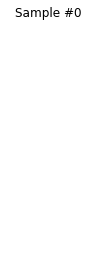

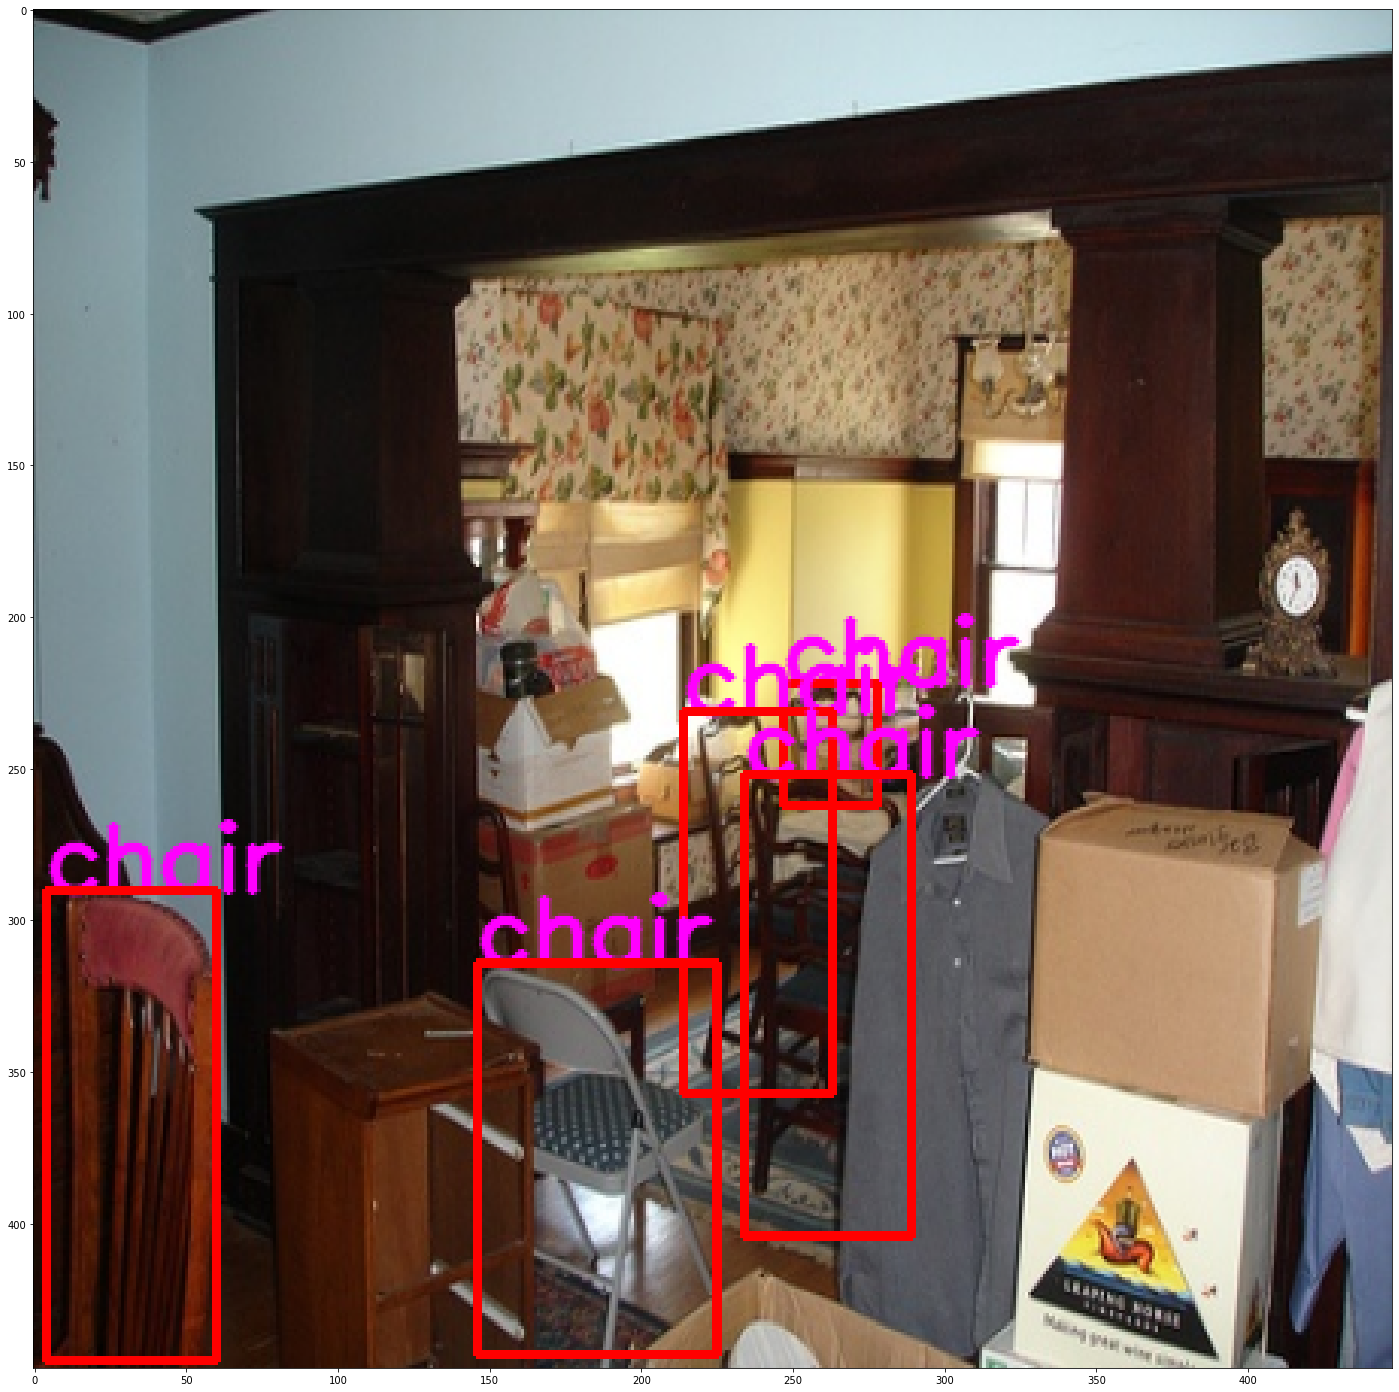

1 torch.Size([3, 448, 448]) torch.Size([7, 7, 30])


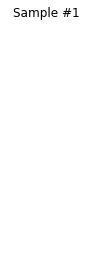

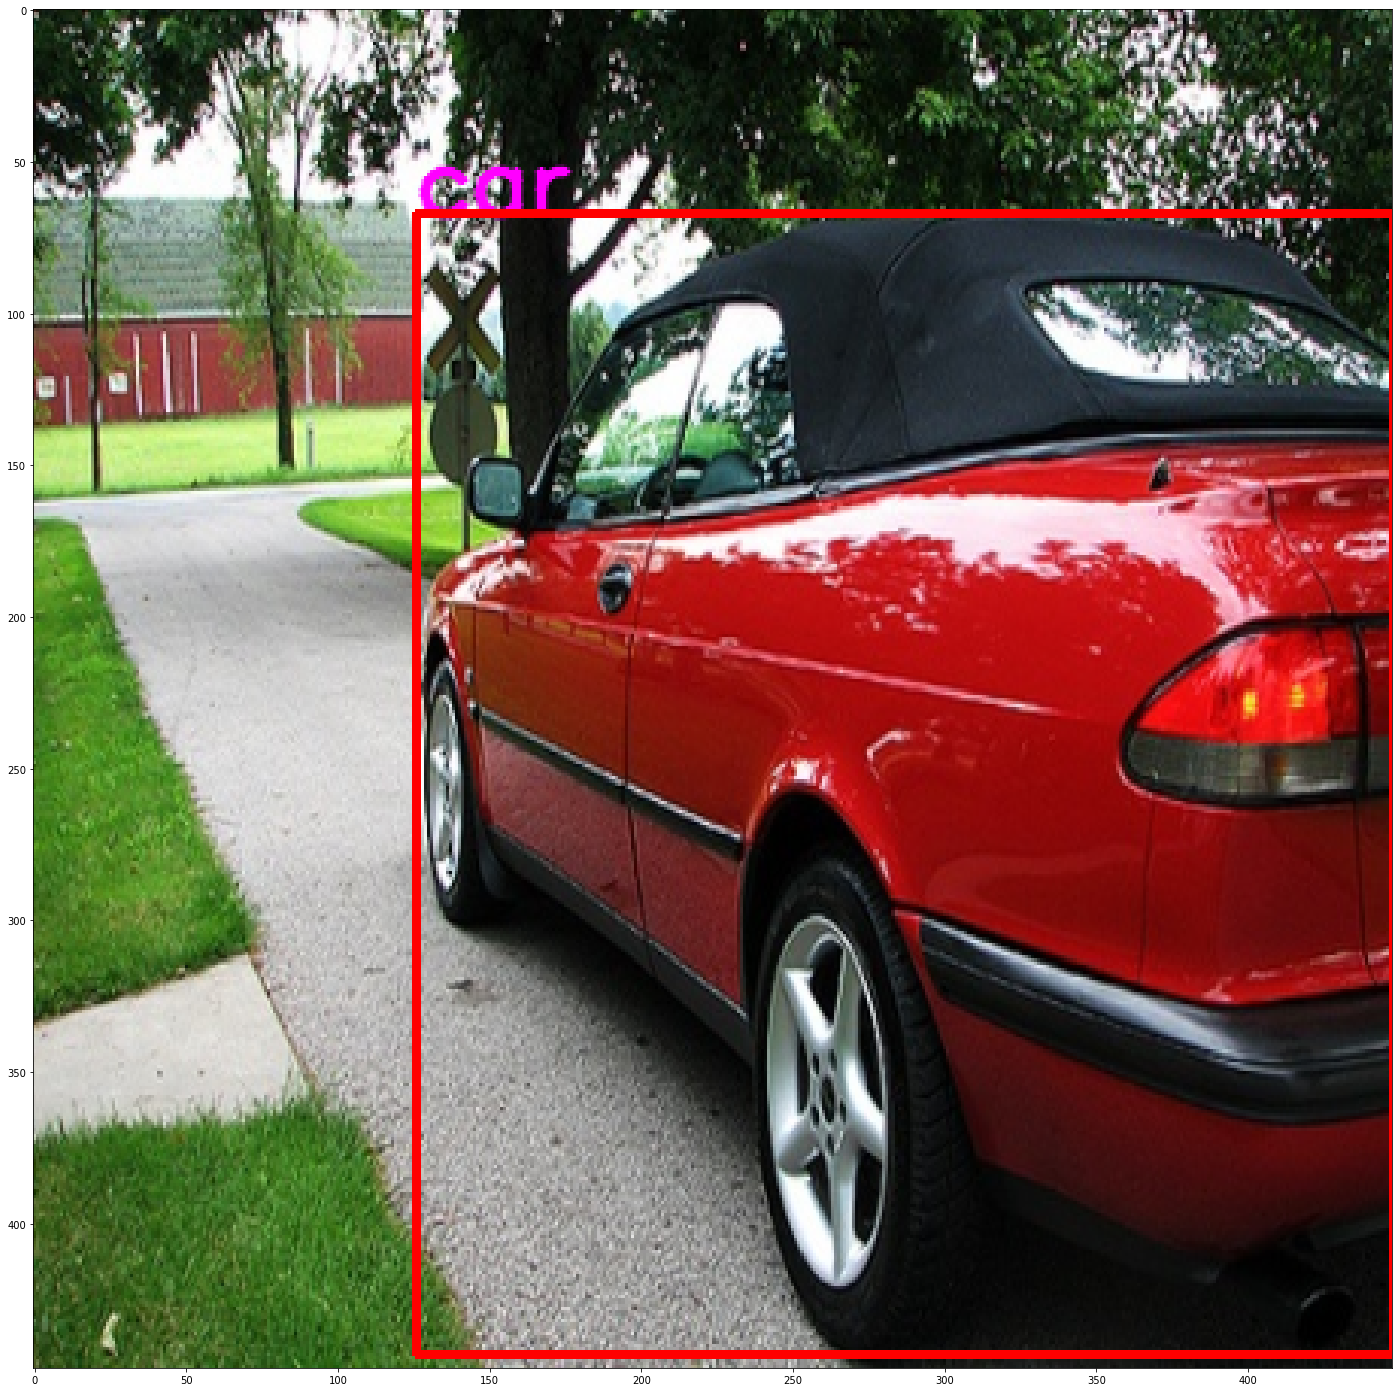

2 torch.Size([3, 448, 448]) torch.Size([7, 7, 30])


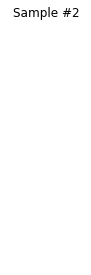

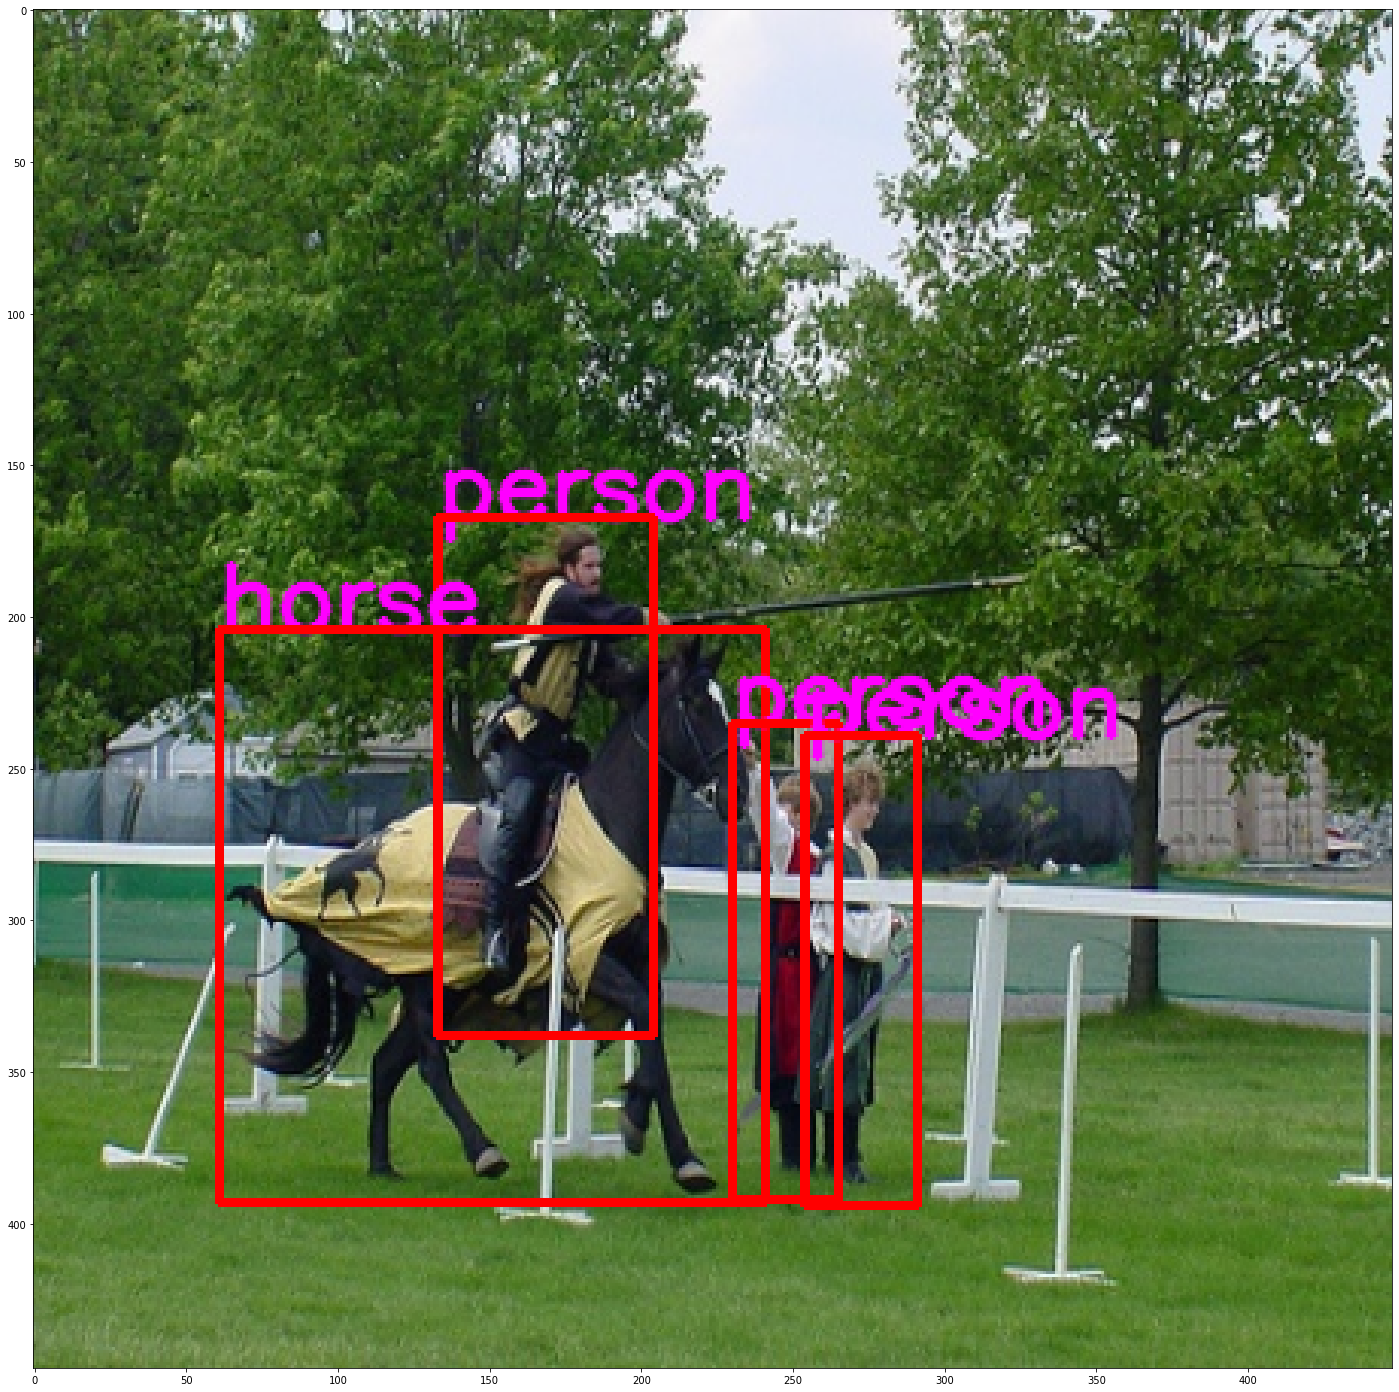

3 torch.Size([3, 448, 448]) torch.Size([7, 7, 30])


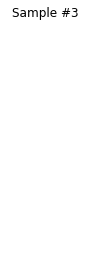

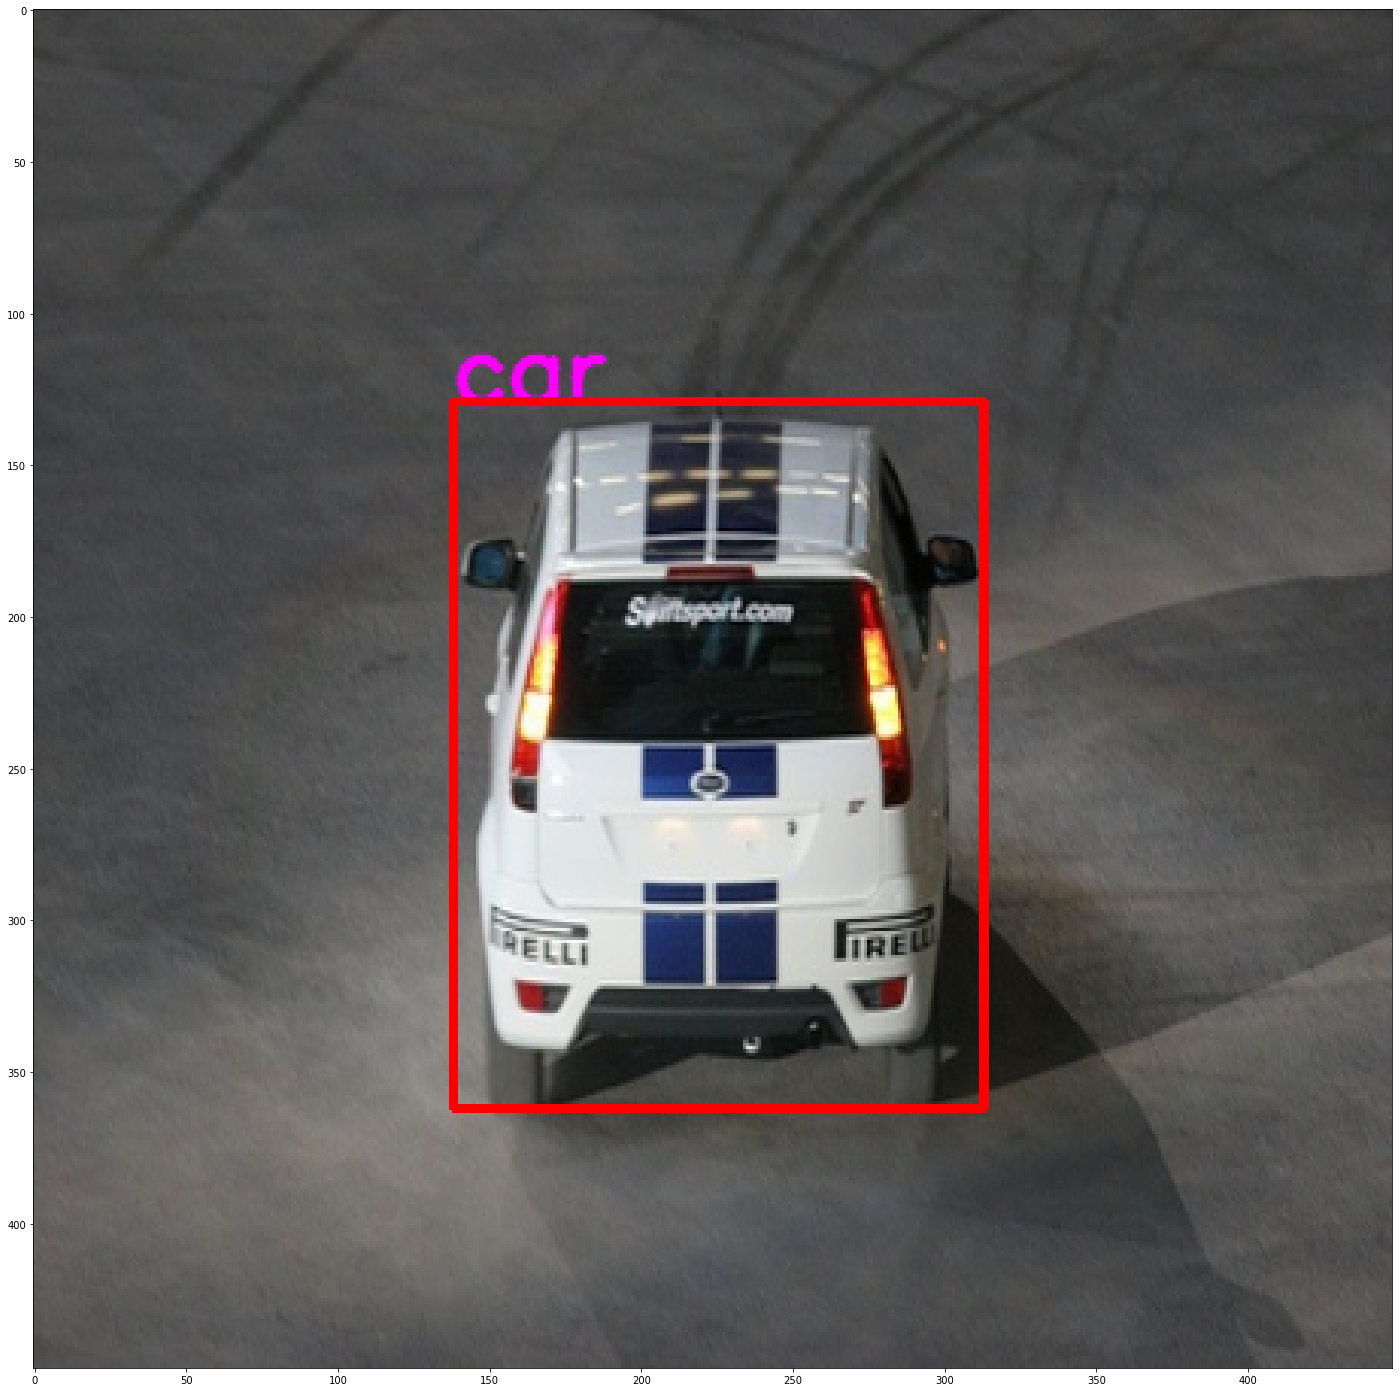

In [8]:
train = VOCDataset(voc_train_annotations,voc_train_images,transform=transforms.Compose([
                                               Rescale(new_size),ToTensor()
                                           ]))
val = VOCDataset(voc_val_annotations,voc_val.images,transform=transforms.Compose([
                                               Rescale(new_size),ToTensor()
                                           ]))

test = VOCDataset(voc_test_annotations,voc_test.images,transform=transforms.Compose([
                                               Rescale(new_size),
                                            ToTensor()
                                           ]))
data = train
fig = plt.figure()

for i in range(len(data)):
    sample = data[i]

    print(i, sample['image'].shape, sample['annotation'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    showSample(sample)

    if i == 3:
        plt.show()
        break

0 torch.Size([64, 3, 448, 448]) torch.Size([64, 7, 7, 30])
1 torch.Size([64, 3, 448, 448]) torch.Size([64, 7, 7, 30])
2 torch.Size([64, 3, 448, 448]) torch.Size([64, 7, 7, 30])
3 torch.Size([64, 3, 448, 448]) torch.Size([64, 7, 7, 30])


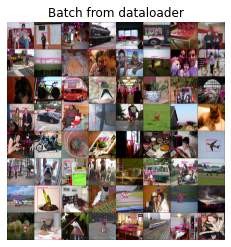

In [9]:
batch_size = 64
epochs = 5
trainLoaders = {}


trainLoader = DataLoader(train, batch_size,
                        shuffle=True, num_workers=2)

valLoader = DataLoader(val, batch_size,
                        shuffle=True, num_workers=2)

testLoader = DataLoader(test, batch_size=batch_size,
                        shuffle=False, num_workers=2)


trainLoaders["train"] = trainLoader
trainLoaders["val"] = valLoader

for i_batch, sample_batched in enumerate(trainLoader):
    print(i_batch, sample_batched['image'].size(),
            sample_batched['annotation'].size())

    if i_batch == 3:
        plt.figure()
        show_annotations_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [10]:
modelName = "mobilenet"
model = YOLOv1(modelName).to(device)

In [11]:
optimizer = optim.Adam(model.parameters(),lr = 0.0001)

In [12]:
params_to_update = model.parameters()
print("Params to learn:")
s = 0
params_to_update = []
for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        s+=param.data.reshape(-1).shape[0]
        print("\t",name)

print(s)

Params to learn:
	 conv.0.weight
	 conv.0.bias
	 conv.1.weight
	 conv.1.bias
	 conv.2.weight
	 conv.2.bias
	 conv.3.weight
	 conv.3.bias
	 conv.4.weight
	 conv.4.bias
	 conv.5.weight
	 conv.5.bias
	 fc1.weight
	 fc1.bias
	 predictor.weight
	 predictor.bias
50337214


In [13]:
model.load_state_dict(torch.load("trained/mobilenet"))
model,train_hist,val_hist = train_model(model,trainLoaders,optimizer,5,device = device,isSave=True,filename=modelName)

Epoch 0/4
----------


  1%|▍                                                                                 | 1/168 [00:12<35:48, 12.86s/it]

 Iteration Loss: 98.16787719726562


  1%|▉                                                                                 | 2/168 [00:21<29:14, 10.57s/it]

 Iteration Loss: 141.28639221191406


  2%|█▍                                                                                | 3/168 [00:30<26:43,  9.72s/it]

 Iteration Loss: 119.61924743652344


  2%|█▉                                                                                | 4/168 [00:39<25:26,  9.31s/it]

 Iteration Loss: 129.88565063476562


  3%|██▍                                                                               | 5/168 [00:47<24:42,  9.09s/it]

 Iteration Loss: 111.38062286376953


  4%|██▉                                                                               | 6/168 [00:56<24:04,  8.92s/it]

 Iteration Loss: 119.18618774414062


  4%|███▍                                                                              | 7/168 [01:05<23:47,  8.86s/it]

 Iteration Loss: 122.56739807128906


  5%|███▉                                                                              | 8/168 [01:13<23:26,  8.79s/it]

 Iteration Loss: 107.52824401855469


  5%|████▍                                                                             | 9/168 [01:22<23:12,  8.76s/it]

 Iteration Loss: 136.59622192382812


  6%|████▊                                                                            | 10/168 [01:31<22:58,  8.73s/it]

 Iteration Loss: 135.61203002929688


  7%|█████▎                                                                           | 11/168 [01:39<22:45,  8.69s/it]

 Iteration Loss: 94.75703430175781


  7%|█████▊                                                                           | 12/168 [01:48<22:29,  8.65s/it]

 Iteration Loss: 108.61376953125


  8%|██████▎                                                                          | 13/168 [01:56<22:15,  8.62s/it]

 Iteration Loss: 112.61473846435547


  8%|██████▊                                                                          | 14/168 [02:05<22:02,  8.59s/it]

 Iteration Loss: 98.02333068847656


  9%|███████▏                                                                         | 15/168 [02:14<22:02,  8.64s/it]

 Iteration Loss: 129.05612182617188


 10%|███████▋                                                                         | 16/168 [02:22<21:57,  8.67s/it]

 Iteration Loss: 145.0757293701172


 10%|████████▏                                                                        | 17/168 [02:31<21:43,  8.63s/it]

 Iteration Loss: 175.02587890625


 11%|████████▋                                                                        | 18/168 [02:40<21:29,  8.60s/it]

 Iteration Loss: 115.53275299072266


 11%|█████████▏                                                                       | 19/168 [02:48<21:18,  8.58s/it]

 Iteration Loss: 119.56626892089844


 12%|█████████▋                                                                       | 20/168 [02:57<21:10,  8.58s/it]

 Iteration Loss: 147.52520751953125


 12%|██████████▏                                                                      | 21/168 [03:05<20:58,  8.56s/it]

 Iteration Loss: 145.87252807617188


 13%|██████████▌                                                                      | 22/168 [03:14<20:58,  8.62s/it]

 Iteration Loss: 101.77547454833984


 14%|███████████                                                                      | 23/168 [03:22<20:42,  8.57s/it]

 Iteration Loss: 127.65855407714844


 14%|███████████▌                                                                     | 24/168 [03:31<20:31,  8.55s/it]

 Iteration Loss: 113.94098663330078


 15%|████████████                                                                     | 25/168 [03:39<20:23,  8.56s/it]

 Iteration Loss: 127.7778091430664


 15%|████████████▌                                                                    | 26/168 [03:48<20:14,  8.55s/it]

 Iteration Loss: 106.04414367675781


 16%|█████████████                                                                    | 27/168 [03:56<20:02,  8.53s/it]

 Iteration Loss: 114.14596557617188


 17%|█████████████▌                                                                   | 28/168 [04:05<19:59,  8.57s/it]

 Iteration Loss: 144.5313720703125


 17%|█████████████▉                                                                   | 29/168 [04:14<19:48,  8.55s/it]

 Iteration Loss: 118.89498138427734


 18%|██████████████▍                                                                  | 30/168 [04:22<19:40,  8.55s/it]

 Iteration Loss: 106.45503997802734


 18%|██████████████▉                                                                  | 31/168 [04:31<19:28,  8.53s/it]

 Iteration Loss: 178.8665008544922


 19%|███████████████▍                                                                 | 32/168 [04:39<19:20,  8.53s/it]

 Iteration Loss: 137.12527465820312


 20%|███████████████▉                                                                 | 33/168 [04:48<19:18,  8.58s/it]

 Iteration Loss: 105.75042724609375


 20%|████████████████▍                                                                | 34/168 [04:56<19:05,  8.55s/it]

 Iteration Loss: 114.20349884033203


 21%|████████████████▉                                                                | 35/168 [05:05<18:54,  8.53s/it]

 Iteration Loss: 109.2657699584961


 21%|█████████████████▎                                                               | 36/168 [05:14<18:50,  8.56s/it]

 Iteration Loss: 119.87167358398438


 22%|█████████████████▊                                                               | 37/168 [05:22<18:40,  8.55s/it]

 Iteration Loss: 123.98614501953125


 23%|██████████████████▎                                                              | 38/168 [05:31<18:30,  8.54s/it]

 Iteration Loss: 166.0214385986328


 23%|██████████████████▊                                                              | 39/168 [05:39<18:20,  8.53s/it]

 Iteration Loss: 164.57582092285156


 24%|███████████████████▎                                                             | 40/168 [05:48<18:13,  8.54s/it]

 Iteration Loss: 114.16315460205078


 24%|███████████████████▊                                                             | 41/168 [05:56<18:05,  8.55s/it]

 Iteration Loss: 127.15823364257812


 25%|████████████████████▎                                                            | 42/168 [06:05<17:55,  8.53s/it]

 Iteration Loss: 149.3115692138672


 26%|████████████████████▋                                                            | 43/168 [06:13<17:44,  8.52s/it]

 Iteration Loss: 129.5039520263672


 26%|█████████████████████▏                                                           | 44/168 [06:22<17:35,  8.51s/it]

 Iteration Loss: 108.15255737304688


 27%|█████████████████████▋                                                           | 45/168 [06:30<17:28,  8.53s/it]

 Iteration Loss: 109.06625366210938


 27%|██████████████████████▏                                                          | 46/168 [06:39<17:44,  8.73s/it]

 Iteration Loss: 113.71310424804688


 28%|██████████████████████▋                                                          | 47/168 [06:48<17:40,  8.76s/it]

 Iteration Loss: 101.16598510742188


 29%|███████████████████████▏                                                         | 48/168 [06:57<17:19,  8.66s/it]

 Iteration Loss: 121.61288452148438


 29%|███████████████████████▋                                                         | 49/168 [07:05<17:05,  8.62s/it]

 Iteration Loss: 120.50250244140625


 30%|████████████████████████                                                         | 50/168 [07:14<16:58,  8.63s/it]

 Iteration Loss: 141.1745147705078


 30%|████████████████████████▌                                                        | 51/168 [07:22<16:44,  8.59s/it]

 Iteration Loss: 121.4881362915039


 31%|█████████████████████████                                                        | 52/168 [07:31<16:33,  8.57s/it]

 Iteration Loss: 119.38327026367188


 32%|█████████████████████████▌                                                       | 53/168 [07:39<16:24,  8.56s/it]

 Iteration Loss: 110.33905792236328


 32%|██████████████████████████                                                       | 54/168 [07:48<16:20,  8.60s/it]

 Iteration Loss: 139.9376983642578


 33%|██████████████████████████▌                                                      | 55/168 [07:57<16:11,  8.60s/it]

 Iteration Loss: 111.22370910644531


 33%|███████████████████████████                                                      | 56/168 [08:05<16:00,  8.58s/it]

 Iteration Loss: 127.31887817382812


 34%|███████████████████████████▍                                                     | 57/168 [08:14<15:49,  8.56s/it]

 Iteration Loss: 118.82853698730469


 35%|███████████████████████████▉                                                     | 58/168 [08:22<15:42,  8.57s/it]

 Iteration Loss: 113.973876953125


 35%|████████████████████████████▍                                                    | 59/168 [08:31<15:27,  8.51s/it]

 Iteration Loss: 113.79087829589844


 36%|████████████████████████████▉                                                    | 60/168 [08:39<15:20,  8.53s/it]

 Iteration Loss: 115.04149627685547


 36%|█████████████████████████████▍                                                   | 61/168 [08:48<15:10,  8.51s/it]

 Iteration Loss: 115.9173355102539


 37%|█████████████████████████████▉                                                   | 62/168 [08:56<15:00,  8.50s/it]

 Iteration Loss: 139.5799102783203


 38%|██████████████████████████████▍                                                  | 63/168 [09:05<14:55,  8.53s/it]

 Iteration Loss: 108.17513275146484


 38%|██████████████████████████████▊                                                  | 64/168 [09:13<14:48,  8.55s/it]

 Iteration Loss: 116.7970199584961


 39%|███████████████████████████████▎                                                 | 65/168 [09:22<14:45,  8.60s/it]

 Iteration Loss: 151.73516845703125


 39%|███████████████████████████████▊                                                 | 66/168 [09:31<14:33,  8.57s/it]

 Iteration Loss: 119.56634521484375


 40%|████████████████████████████████▎                                                | 67/168 [09:39<14:25,  8.57s/it]

 Iteration Loss: 107.67265319824219


 40%|████████████████████████████████▊                                                | 68/168 [09:48<14:13,  8.53s/it]

 Iteration Loss: 113.08564758300781


 41%|█████████████████████████████████▎                                               | 69/168 [09:56<14:05,  8.54s/it]

 Iteration Loss: 110.9025650024414


 42%|█████████████████████████████████▊                                               | 70/168 [10:05<13:56,  8.53s/it]

 Iteration Loss: 103.6211166381836


 42%|██████████████████████████████████▏                                              | 71/168 [10:13<13:47,  8.53s/it]

 Iteration Loss: 120.66410064697266


 43%|██████████████████████████████████▋                                              | 72/168 [10:22<13:37,  8.51s/it]

 Iteration Loss: 107.2229232788086


 43%|███████████████████████████████████▏                                             | 73/168 [10:30<13:28,  8.51s/it]

 Iteration Loss: 109.46236419677734


 44%|███████████████████████████████████▋                                             | 74/168 [10:39<13:19,  8.50s/it]

 Iteration Loss: 152.4612274169922


 45%|████████████████████████████████████▏                                            | 75/168 [10:47<13:12,  8.52s/it]

 Iteration Loss: 145.8688507080078


 45%|████████████████████████████████████▋                                            | 76/168 [10:56<13:03,  8.52s/it]

 Iteration Loss: 138.45973205566406


 46%|█████████████████████████████████████▏                                           | 77/168 [11:04<12:57,  8.54s/it]

 Iteration Loss: 115.98065948486328


 46%|█████████████████████████████████████▌                                           | 78/168 [11:13<12:51,  8.57s/it]

 Iteration Loss: 145.6234893798828


 47%|██████████████████████████████████████                                           | 79/168 [11:22<12:42,  8.57s/it]

 Iteration Loss: 147.33978271484375


 48%|██████████████████████████████████████▌                                          | 80/168 [11:30<12:31,  8.54s/it]

 Iteration Loss: 109.94965362548828


 48%|███████████████████████████████████████                                          | 81/168 [11:39<12:23,  8.54s/it]

 Iteration Loss: 120.127197265625


 49%|███████████████████████████████████████▌                                         | 82/168 [11:47<12:13,  8.53s/it]

 Iteration Loss: 132.0135955810547


 49%|████████████████████████████████████████                                         | 83/168 [11:56<12:06,  8.54s/it]

 Iteration Loss: 108.28350067138672


 50%|████████████████████████████████████████▌                                        | 84/168 [12:04<11:59,  8.57s/it]

 Iteration Loss: 137.44219970703125


 51%|████████████████████████████████████████▉                                        | 85/168 [12:13<11:48,  8.54s/it]

 Iteration Loss: 113.2611312866211


 51%|█████████████████████████████████████████▍                                       | 86/168 [12:21<11:37,  8.51s/it]

 Iteration Loss: 124.04638671875


 52%|█████████████████████████████████████████▉                                       | 87/168 [12:30<11:27,  8.49s/it]

 Iteration Loss: 145.66297912597656


 52%|██████████████████████████████████████████▍                                      | 88/168 [12:38<11:20,  8.51s/it]

 Iteration Loss: 115.86568450927734


 53%|██████████████████████████████████████████▉                                      | 89/168 [12:47<11:12,  8.51s/it]

 Iteration Loss: 107.78511047363281


 54%|███████████████████████████████████████████▍                                     | 90/168 [12:55<11:02,  8.50s/it]

 Iteration Loss: 168.80288696289062


 54%|███████████████████████████████████████████▉                                     | 91/168 [13:04<10:56,  8.52s/it]

 Iteration Loss: 123.45838928222656


 55%|████████████████████████████████████████████▎                                    | 92/168 [13:12<10:51,  8.58s/it]

 Iteration Loss: 114.61711883544922


 55%|████████████████████████████████████████████▊                                    | 93/168 [13:21<10:42,  8.56s/it]

 Iteration Loss: 116.97976684570312


 56%|█████████████████████████████████████████████▎                                   | 94/168 [13:30<10:32,  8.55s/it]

 Iteration Loss: 136.9033966064453


 57%|█████████████████████████████████████████████▊                                   | 95/168 [13:38<10:21,  8.51s/it]

 Iteration Loss: 104.01171875


 57%|██████████████████████████████████████████████▎                                  | 96/168 [13:46<10:12,  8.50s/it]

 Iteration Loss: 117.8305892944336


 58%|██████████████████████████████████████████████▊                                  | 97/168 [13:55<10:03,  8.51s/it]

 Iteration Loss: 129.91558837890625


 58%|███████████████████████████████████████████████▎                                 | 98/168 [14:03<09:54,  8.50s/it]

 Iteration Loss: 104.71112060546875


 59%|███████████████████████████████████████████████▋                                 | 99/168 [14:12<09:47,  8.52s/it]

 Iteration Loss: 128.53475952148438


 60%|███████████████████████████████████████████████▌                                | 100/168 [14:20<09:39,  8.52s/it]

 Iteration Loss: 120.9585189819336


 60%|████████████████████████████████████████████████                                | 101/168 [14:29<09:30,  8.52s/it]

 Iteration Loss: 116.92351531982422


 61%|████████████████████████████████████████████████▌                               | 102/168 [14:38<09:22,  8.52s/it]

 Iteration Loss: 136.8545379638672


 61%|█████████████████████████████████████████████████                               | 103/168 [14:46<09:13,  8.52s/it]

 Iteration Loss: 151.96548461914062


 62%|█████████████████████████████████████████████████▌                              | 104/168 [14:55<09:06,  8.53s/it]

 Iteration Loss: 132.9581756591797


 62%|██████████████████████████████████████████████████                              | 105/168 [15:03<08:57,  8.54s/it]

 Iteration Loss: 108.699462890625


 63%|██████████████████████████████████████████████████▍                             | 106/168 [15:12<08:50,  8.56s/it]

 Iteration Loss: 110.44743347167969


 64%|██████████████████████████████████████████████████▉                             | 107/168 [15:20<08:42,  8.57s/it]

 Iteration Loss: 140.76145935058594


 64%|███████████████████████████████████████████████████▍                            | 108/168 [15:29<08:33,  8.56s/it]

 Iteration Loss: 125.77754211425781


 65%|███████████████████████████████████████████████████▉                            | 109/168 [15:37<08:21,  8.50s/it]

 Iteration Loss: 127.28266143798828


 65%|████████████████████████████████████████████████████▍                           | 110/168 [15:46<08:14,  8.52s/it]

 Iteration Loss: 105.82612609863281


 66%|████████████████████████████████████████████████████▊                           | 111/168 [15:54<08:04,  8.51s/it]

 Iteration Loss: 129.91915893554688


 67%|█████████████████████████████████████████████████████▎                          | 112/168 [16:03<07:56,  8.51s/it]

 Iteration Loss: 133.17881774902344


 67%|█████████████████████████████████████████████████████▊                          | 113/168 [16:11<07:48,  8.52s/it]

 Iteration Loss: 119.93582916259766


 68%|██████████████████████████████████████████████████████▎                         | 114/168 [16:20<07:38,  8.48s/it]

 Iteration Loss: 111.12689208984375


 68%|██████████████████████████████████████████████████████▊                         | 115/168 [16:28<07:29,  8.49s/it]

 Iteration Loss: 123.52841186523438


 69%|███████████████████████████████████████████████████████▏                        | 116/168 [16:37<07:22,  8.50s/it]

 Iteration Loss: 145.22705078125


 70%|███████████████████████████████████████████████████████▋                        | 117/168 [16:45<07:12,  8.47s/it]

 Iteration Loss: 140.35830688476562


 70%|████████████████████████████████████████████████████████▏                       | 118/168 [16:54<07:04,  8.48s/it]

 Iteration Loss: 125.54285430908203


 71%|████████████████████████████████████████████████████████▋                       | 119/168 [17:02<06:55,  8.48s/it]

 Iteration Loss: 136.27603149414062


 71%|█████████████████████████████████████████████████████████▏                      | 120/168 [17:11<06:50,  8.56s/it]

 Iteration Loss: 147.6083526611328


 72%|█████████████████████████████████████████████████████████▌                      | 121/168 [17:19<06:41,  8.54s/it]

 Iteration Loss: 110.00069427490234


 73%|██████████████████████████████████████████████████████████                      | 122/168 [17:28<06:31,  8.52s/it]

 Iteration Loss: 110.5646743774414


 73%|██████████████████████████████████████████████████████████▌                     | 123/168 [17:36<06:23,  8.52s/it]

 Iteration Loss: 139.88442993164062


 74%|███████████████████████████████████████████████████████████                     | 124/168 [17:45<06:14,  8.52s/it]

 Iteration Loss: 106.7387924194336


 74%|███████████████████████████████████████████████████████████▌                    | 125/168 [17:53<06:05,  8.50s/it]

 Iteration Loss: 175.5446014404297


 75%|████████████████████████████████████████████████████████████                    | 126/168 [18:02<05:58,  8.53s/it]

 Iteration Loss: 155.22840881347656


 76%|████████████████████████████████████████████████████████████▍                   | 127/168 [18:10<05:49,  8.51s/it]

 Iteration Loss: 104.78179931640625


 76%|████████████████████████████████████████████████████████████▉                   | 128/168 [18:19<05:41,  8.53s/it]

 Iteration Loss: 177.6896209716797


 77%|█████████████████████████████████████████████████████████████▍                  | 129/168 [18:27<05:31,  8.50s/it]

 Iteration Loss: 122.84928894042969


 77%|█████████████████████████████████████████████████████████████▉                  | 130/168 [18:36<05:23,  8.50s/it]

 Iteration Loss: 143.04856872558594


 78%|██████████████████████████████████████████████████████████████▍                 | 131/168 [18:45<05:15,  8.52s/it]

 Iteration Loss: 122.47178649902344


 79%|██████████████████████████████████████████████████████████████▊                 | 132/168 [18:53<05:05,  8.49s/it]

 Iteration Loss: 108.94618225097656


 79%|███████████████████████████████████████████████████████████████▎                | 133/168 [19:01<04:57,  8.51s/it]

 Iteration Loss: 127.91165924072266


 80%|███████████████████████████████████████████████████████████████▊                | 134/168 [19:10<04:50,  8.55s/it]

 Iteration Loss: 119.29009246826172


 80%|████████████████████████████████████████████████████████████████▎               | 135/168 [19:19<04:41,  8.54s/it]

 Iteration Loss: 144.57217407226562


 81%|████████████████████████████████████████████████████████████████▊               | 136/168 [19:27<04:34,  8.57s/it]

 Iteration Loss: 131.54891967773438


 82%|█████████████████████████████████████████████████████████████████▏              | 137/168 [19:36<04:25,  8.55s/it]

 Iteration Loss: 110.9107666015625


 82%|█████████████████████████████████████████████████████████████████▋              | 138/168 [19:44<04:16,  8.56s/it]

 Iteration Loss: 151.53773498535156


 83%|██████████████████████████████████████████████████████████████████▏             | 139/168 [19:53<04:07,  8.55s/it]

 Iteration Loss: 138.10757446289062


 83%|██████████████████████████████████████████████████████████████████▋             | 140/168 [20:01<03:58,  8.51s/it]

 Iteration Loss: 137.68968200683594


 84%|███████████████████████████████████████████████████████████████████▏            | 141/168 [20:10<03:50,  8.53s/it]

 Iteration Loss: 144.5117645263672


 85%|███████████████████████████████████████████████████████████████████▌            | 142/168 [20:18<03:40,  8.49s/it]

 Iteration Loss: 126.6373519897461


 85%|████████████████████████████████████████████████████████████████████            | 143/168 [20:27<03:32,  8.50s/it]

 Iteration Loss: 135.59335327148438


 86%|████████████████████████████████████████████████████████████████████▌           | 144/168 [20:35<03:24,  8.51s/it]

 Iteration Loss: 127.11406707763672


 86%|█████████████████████████████████████████████████████████████████████           | 145/168 [20:44<03:15,  8.49s/it]

 Iteration Loss: 106.34571838378906


 87%|█████████████████████████████████████████████████████████████████████▌          | 146/168 [20:52<03:07,  8.50s/it]

 Iteration Loss: 108.78323364257812


 88%|██████████████████████████████████████████████████████████████████████          | 147/168 [21:01<02:59,  8.54s/it]

 Iteration Loss: 106.61515045166016


 88%|██████████████████████████████████████████████████████████████████████▍         | 148/168 [21:10<02:51,  8.55s/it]

 Iteration Loss: 159.70751953125


 89%|██████████████████████████████████████████████████████████████████████▉         | 149/168 [21:18<02:42,  8.57s/it]

 Iteration Loss: 147.7618865966797


 89%|███████████████████████████████████████████████████████████████████████▍        | 150/168 [21:27<02:34,  8.59s/it]

 Iteration Loss: 113.6983413696289


 90%|███████████████████████████████████████████████████████████████████████▉        | 151/168 [21:35<02:26,  8.60s/it]

 Iteration Loss: 115.58232116699219


 90%|████████████████████████████████████████████████████████████████████████▍       | 152/168 [21:44<02:18,  8.66s/it]

 Iteration Loss: 108.36542510986328


 91%|████████████████████████████████████████████████████████████████████████▊       | 153/168 [21:53<02:10,  8.70s/it]

 Iteration Loss: 147.70791625976562


 92%|█████████████████████████████████████████████████████████████████████████▎      | 154/168 [22:02<02:01,  8.65s/it]

 Iteration Loss: 123.62052154541016


 92%|█████████████████████████████████████████████████████████████████████████▊      | 155/168 [22:10<01:51,  8.58s/it]

 Iteration Loss: 158.2362823486328


 93%|██████████████████████████████████████████████████████████████████████████▎     | 156/168 [22:18<01:42,  8.53s/it]

 Iteration Loss: 193.30905151367188


 93%|██████████████████████████████████████████████████████████████████████████▊     | 157/168 [22:27<01:33,  8.52s/it]

 Iteration Loss: 152.8642578125


 94%|███████████████████████████████████████████████████████████████████████████▏    | 158/168 [22:35<01:25,  8.51s/it]

 Iteration Loss: 143.49244689941406


 95%|███████████████████████████████████████████████████████████████████████████▋    | 159/168 [22:44<01:16,  8.51s/it]

 Iteration Loss: 103.93994140625


 95%|████████████████████████████████████████████████████████████████████████████▏   | 160/168 [22:52<01:08,  8.52s/it]

 Iteration Loss: 149.5889434814453


 96%|████████████████████████████████████████████████████████████████████████████▋   | 161/168 [23:01<00:59,  8.53s/it]

 Iteration Loss: 148.43637084960938


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 162/168 [23:10<00:51,  8.56s/it]

 Iteration Loss: 126.02024841308594


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 163/168 [23:19<00:43,  8.66s/it]

 Iteration Loss: 114.123046875


 98%|██████████████████████████████████████████████████████████████████████████████  | 164/168 [23:27<00:34,  8.59s/it]

 Iteration Loss: 103.60861206054688


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 165/168 [23:35<00:25,  8.52s/it]

 Iteration Loss: 148.78712463378906


 99%|███████████████████████████████████████████████████████████████████████████████ | 166/168 [23:44<00:16,  8.49s/it]

 Iteration Loss: 125.66619873046875


 99%|███████████████████████████████████████████████████████████████████████████████▌| 167/168 [23:52<00:08,  8.46s/it]

 Iteration Loss: 107.69036102294922


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [23:58<00:00,  7.54s/it]

 Iteration Loss: 91.95221710205078


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [23:58<00:00,  8.56s/it]


train prev epoch Loss: 0
train next epoch Loss: 126.32027921222505


  1%|▉                                                                                  | 1/91 [00:09<14:10,  9.45s/it]

 Iteration Loss: 199.5828399658203


  2%|█▊                                                                                 | 2/91 [00:15<11:14,  7.58s/it]

 Iteration Loss: 189.13153076171875


  3%|██▋                                                                                | 3/91 [00:21<10:11,  6.95s/it]

 Iteration Loss: 282.8005676269531


  4%|███▋                                                                               | 4/91 [00:28<09:38,  6.65s/it]

 Iteration Loss: 306.4300842285156


  5%|████▌                                                                              | 5/91 [00:34<09:17,  6.48s/it]

 Iteration Loss: 250.65264892578125


  7%|█████▍                                                                             | 6/91 [00:40<09:04,  6.41s/it]

 Iteration Loss: 216.52554321289062


  8%|██████▍                                                                            | 7/91 [00:46<08:52,  6.34s/it]

 Iteration Loss: 238.49160766601562


  9%|███████▎                                                                           | 8/91 [00:52<08:42,  6.29s/it]

 Iteration Loss: 238.61305236816406


 10%|████████▏                                                                          | 9/91 [00:59<08:36,  6.30s/it]

 Iteration Loss: 210.3373260498047


 11%|█████████                                                                         | 10/91 [01:05<08:29,  6.29s/it]

 Iteration Loss: 257.56591796875


 12%|█████████▉                                                                        | 11/91 [01:12<08:29,  6.36s/it]

 Iteration Loss: 229.09893798828125


 13%|██████████▊                                                                       | 12/91 [01:18<08:23,  6.37s/it]

 Iteration Loss: 211.6753692626953


 14%|███████████▋                                                                      | 13/91 [01:24<08:16,  6.37s/it]

 Iteration Loss: 229.79415893554688


 15%|████████████▌                                                                     | 14/91 [01:31<08:08,  6.34s/it]

 Iteration Loss: 249.55941772460938


 16%|█████████████▌                                                                    | 15/91 [01:37<08:00,  6.32s/it]

 Iteration Loss: 271.1798095703125


 18%|██████████████▍                                                                   | 16/91 [01:43<07:53,  6.31s/it]

 Iteration Loss: 191.70053100585938


 19%|███████████████▎                                                                  | 17/91 [01:49<07:47,  6.31s/it]

 Iteration Loss: 214.02035522460938


 20%|████████████████▏                                                                 | 18/91 [01:56<07:38,  6.29s/it]

 Iteration Loss: 230.02496337890625


 21%|█████████████████                                                                 | 19/91 [02:02<07:34,  6.31s/it]

 Iteration Loss: 221.17665100097656


 22%|██████████████████                                                                | 20/91 [02:08<07:26,  6.29s/it]

 Iteration Loss: 215.41859436035156


 23%|██████████████████▉                                                               | 21/91 [02:15<07:20,  6.29s/it]

 Iteration Loss: 252.07591247558594


 24%|███████████████████▊                                                              | 22/91 [02:21<07:12,  6.26s/it]

 Iteration Loss: 188.12615966796875


 25%|████████████████████▋                                                             | 23/91 [02:27<07:04,  6.25s/it]

 Iteration Loss: 237.6544189453125


 26%|█████████████████████▋                                                            | 24/91 [02:33<06:58,  6.25s/it]

 Iteration Loss: 260.1618957519531


 27%|██████████████████████▌                                                           | 25/91 [02:40<06:53,  6.27s/it]

 Iteration Loss: 236.06277465820312


 29%|███████████████████████▍                                                          | 26/91 [02:46<06:46,  6.25s/it]

 Iteration Loss: 235.589599609375


 30%|████████████████████████▎                                                         | 27/91 [02:52<06:40,  6.25s/it]

 Iteration Loss: 230.04547119140625


 31%|█████████████████████████▏                                                        | 28/91 [02:58<06:31,  6.22s/it]

 Iteration Loss: 228.73611450195312


 32%|██████████████████████████▏                                                       | 29/91 [03:04<06:26,  6.23s/it]

 Iteration Loss: 233.42742919921875


 33%|███████████████████████████                                                       | 30/91 [03:11<06:23,  6.29s/it]

 Iteration Loss: 221.07858276367188


 34%|███████████████████████████▉                                                      | 31/91 [03:17<06:19,  6.32s/it]

 Iteration Loss: 147.5883331298828


 35%|████████████████████████████▊                                                     | 32/91 [03:23<06:10,  6.28s/it]

 Iteration Loss: 267.5106506347656


 36%|█████████████████████████████▋                                                    | 33/91 [03:30<06:03,  6.27s/it]

 Iteration Loss: 204.75267028808594


 37%|██████████████████████████████▋                                                   | 34/91 [03:36<05:55,  6.24s/it]

 Iteration Loss: 226.37318420410156


 38%|███████████████████████████████▌                                                  | 35/91 [03:42<05:49,  6.24s/it]

 Iteration Loss: 215.43946838378906


 40%|████████████████████████████████▍                                                 | 36/91 [03:48<05:42,  6.23s/it]

 Iteration Loss: 257.21405029296875


 41%|█████████████████████████████████▎                                                | 37/91 [03:55<05:37,  6.24s/it]

 Iteration Loss: 239.93350219726562


 42%|██████████████████████████████████▏                                               | 38/91 [04:01<05:30,  6.24s/it]

 Iteration Loss: 233.31629943847656


 43%|███████████████████████████████████▏                                              | 39/91 [04:07<05:25,  6.25s/it]

 Iteration Loss: 200.5782470703125


 44%|████████████████████████████████████                                              | 40/91 [04:13<05:17,  6.23s/it]

 Iteration Loss: 216.0233917236328


 45%|████████████████████████████████████▉                                             | 41/91 [04:20<05:11,  6.24s/it]

 Iteration Loss: 247.1231689453125


 46%|█████████████████████████████████████▊                                            | 42/91 [04:26<05:04,  6.22s/it]

 Iteration Loss: 247.9926300048828


 47%|██████████████████████████████████████▋                                           | 43/91 [04:32<04:59,  6.23s/it]

 Iteration Loss: 197.72988891601562


 48%|███████████████████████████████████████▋                                          | 44/91 [04:38<04:52,  6.23s/it]

 Iteration Loss: 244.92098999023438


 49%|████████████████████████████████████████▌                                         | 45/91 [04:44<04:46,  6.23s/it]

 Iteration Loss: 257.45562744140625


 51%|█████████████████████████████████████████▍                                        | 46/91 [04:51<04:39,  6.21s/it]

 Iteration Loss: 191.35882568359375


 52%|██████████████████████████████████████████▎                                       | 47/91 [04:57<04:33,  6.21s/it]

 Iteration Loss: 245.2332763671875


 53%|███████████████████████████████████████████▎                                      | 48/91 [05:03<04:27,  6.23s/it]

 Iteration Loss: 253.3684539794922


 54%|████████████████████████████████████████████▏                                     | 49/91 [05:09<04:22,  6.24s/it]

 Iteration Loss: 168.34205627441406


 55%|█████████████████████████████████████████████                                     | 50/91 [05:16<04:17,  6.29s/it]

 Iteration Loss: 273.2356262207031


 56%|█████████████████████████████████████████████▉                                    | 51/91 [05:22<04:11,  6.29s/it]

 Iteration Loss: 216.2914581298828


 57%|██████████████████████████████████████████████▊                                   | 52/91 [05:28<04:04,  6.27s/it]

 Iteration Loss: 215.6942138671875


 58%|███████████████████████████████████████████████▊                                  | 53/91 [05:35<03:58,  6.27s/it]

 Iteration Loss: 217.264892578125


 59%|████████████████████████████████████████████████▋                                 | 54/91 [05:41<03:51,  6.26s/it]

 Iteration Loss: 315.8905944824219


 60%|█████████████████████████████████████████████████▌                                | 55/91 [05:47<03:44,  6.25s/it]

 Iteration Loss: 180.57484436035156


 62%|██████████████████████████████████████████████████▍                               | 56/91 [05:53<03:39,  6.26s/it]

 Iteration Loss: 193.32669067382812


 63%|███████████████████████████████████████████████████▎                              | 57/91 [06:00<03:33,  6.28s/it]

 Iteration Loss: 261.47601318359375


 64%|████████████████████████████████████████████████████▎                             | 58/91 [06:06<03:26,  6.25s/it]

 Iteration Loss: 210.0764617919922


 65%|█████████████████████████████████████████████████████▏                            | 59/91 [06:12<03:20,  6.25s/it]

 Iteration Loss: 189.28102111816406


 66%|██████████████████████████████████████████████████████                            | 60/91 [06:18<03:13,  6.23s/it]

 Iteration Loss: 176.6888427734375


 67%|██████████████████████████████████████████████████████▉                           | 61/91 [06:24<03:07,  6.23s/it]

 Iteration Loss: 226.1461181640625


 68%|███████████████████████████████████████████████████████▊                          | 62/91 [06:31<03:00,  6.23s/it]

 Iteration Loss: 210.19564819335938


 69%|████████████████████████████████████████████████████████▊                         | 63/91 [06:37<02:55,  6.26s/it]

 Iteration Loss: 255.9128875732422


 70%|█████████████████████████████████████████████████████████▋                        | 64/91 [06:43<02:49,  6.28s/it]

 Iteration Loss: 157.11471557617188


 71%|██████████████████████████████████████████████████████████▌                       | 65/91 [06:50<02:43,  6.27s/it]

 Iteration Loss: 222.92135620117188


 73%|███████████████████████████████████████████████████████████▍                      | 66/91 [06:56<02:36,  6.27s/it]

 Iteration Loss: 242.97572326660156


 74%|████████████████████████████████████████████████████████████▎                     | 67/91 [07:02<02:30,  6.28s/it]

 Iteration Loss: 180.0094757080078


 75%|█████████████████████████████████████████████████████████████▎                    | 68/91 [07:08<02:23,  6.24s/it]

 Iteration Loss: 226.5951385498047


 76%|██████████████████████████████████████████████████████████████▏                   | 69/91 [07:15<02:18,  6.32s/it]

 Iteration Loss: 242.18692016601562


 77%|███████████████████████████████████████████████████████████████                   | 70/91 [07:21<02:12,  6.29s/it]

 Iteration Loss: 230.21786499023438


 78%|███████████████████████████████████████████████████████████████▉                  | 71/91 [07:27<02:05,  6.28s/it]

 Iteration Loss: 244.21823120117188


 79%|████████████████████████████████████████████████████████████████▉                 | 72/91 [07:34<01:58,  6.26s/it]

 Iteration Loss: 253.17755126953125


 80%|█████████████████████████████████████████████████████████████████▊                | 73/91 [07:40<01:52,  6.28s/it]

 Iteration Loss: 208.72879028320312


 81%|██████████████████████████████████████████████████████████████████▋               | 74/91 [07:46<01:46,  6.25s/it]

 Iteration Loss: 232.28964233398438


 82%|███████████████████████████████████████████████████████████████████▌              | 75/91 [07:52<01:40,  6.26s/it]

 Iteration Loss: 236.24424743652344


 84%|████████████████████████████████████████████████████████████████████▍             | 76/91 [07:59<01:35,  6.35s/it]

 Iteration Loss: 267.01580810546875


 85%|█████████████████████████████████████████████████████████████████████▍            | 77/91 [08:05<01:29,  6.37s/it]

 Iteration Loss: 232.3818817138672


 86%|██████████████████████████████████████████████████████████████████████▎           | 78/91 [08:11<01:22,  6.32s/it]

 Iteration Loss: 217.7071990966797


 87%|███████████████████████████████████████████████████████████████████████▏          | 79/91 [08:18<01:15,  6.31s/it]

 Iteration Loss: 201.9773712158203


 88%|████████████████████████████████████████████████████████████████████████          | 80/91 [08:24<01:09,  6.28s/it]

 Iteration Loss: 189.71905517578125


 89%|████████████████████████████████████████████████████████████████████████▉         | 81/91 [08:30<01:02,  6.27s/it]

 Iteration Loss: 158.6381378173828


 90%|█████████████████████████████████████████████████████████████████████████▉        | 82/91 [08:36<00:56,  6.25s/it]

 Iteration Loss: 186.54713439941406


 91%|██████████████████████████████████████████████████████████████████████████▊       | 83/91 [08:43<00:50,  6.26s/it]

 Iteration Loss: 225.23370361328125


 92%|███████████████████████████████████████████████████████████████████████████▋      | 84/91 [08:49<00:43,  6.24s/it]

 Iteration Loss: 194.50131225585938


 93%|████████████████████████████████████████████████████████████████████████████▌     | 85/91 [08:55<00:37,  6.28s/it]

 Iteration Loss: 204.6952667236328


 95%|█████████████████████████████████████████████████████████████████████████████▍    | 86/91 [09:01<00:31,  6.26s/it]

 Iteration Loss: 204.13650512695312


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 87/91 [09:08<00:25,  6.26s/it]

 Iteration Loss: 251.483154296875


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 88/91 [09:14<00:18,  6.30s/it]

 Iteration Loss: 214.26239013671875


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 89/91 [09:20<00:12,  6.30s/it]

 Iteration Loss: 239.5616912841797


 99%|█████████████████████████████████████████████████████████████████████████████████ | 90/91 [09:27<00:06,  6.25s/it]

 Iteration Loss: 238.52635192871094


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [09:33<00:00,  6.21s/it]

 Iteration Loss: 232.6129150390625


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [09:33<00:00,  6.30s/it]


val prev epoch Loss: 126.32027921222505
val next epoch Loss: 225.4585475712032
Epoch 1/4
----------


  1%|▍                                                                                 | 1/168 [00:11<32:36, 11.72s/it]

 Iteration Loss: 138.41848754882812


  1%|▉                                                                                 | 2/168 [00:20<27:17,  9.87s/it]

 Iteration Loss: 96.57925415039062


  2%|█▍                                                                                | 3/168 [00:28<25:30,  9.28s/it]

 Iteration Loss: 108.00955963134766


  2%|█▉                                                                                | 4/168 [00:37<24:48,  9.08s/it]

 Iteration Loss: 102.77749633789062


  3%|██▍                                                                               | 5/168 [00:46<24:16,  8.94s/it]

 Iteration Loss: 97.68589782714844


  4%|██▉                                                                               | 6/168 [00:55<24:01,  8.90s/it]

 Iteration Loss: 126.21370697021484


  4%|███▍                                                                              | 7/168 [01:04<23:55,  8.92s/it]

 Iteration Loss: 110.75953674316406


  5%|███▉                                                                              | 8/168 [01:13<23:46,  8.92s/it]

 Iteration Loss: 130.2209014892578


  5%|████▍                                                                             | 9/168 [01:21<23:25,  8.84s/it]

 Iteration Loss: 83.32551574707031


  6%|████▊                                                                            | 10/168 [01:30<23:03,  8.75s/it]

 Iteration Loss: 92.31397247314453


  7%|█████▎                                                                           | 11/168 [01:39<22:58,  8.78s/it]

 Iteration Loss: 138.30474853515625


  7%|█████▊                                                                           | 12/168 [01:47<22:44,  8.75s/it]

 Iteration Loss: 109.4082260131836


  8%|██████▎                                                                          | 13/168 [01:56<22:31,  8.72s/it]

 Iteration Loss: 86.79239654541016


  8%|██████▊                                                                          | 14/168 [02:05<22:17,  8.69s/it]

 Iteration Loss: 97.59751892089844


  9%|███████▏                                                                         | 15/168 [02:13<22:03,  8.65s/it]

 Iteration Loss: 125.42500305175781


 10%|███████▋                                                                         | 16/168 [02:22<21:50,  8.62s/it]

 Iteration Loss: 101.50142669677734


 10%|████████▏                                                                        | 17/168 [02:30<21:41,  8.62s/it]

 Iteration Loss: 79.44804382324219


 11%|████████▋                                                                        | 18/168 [02:39<21:29,  8.60s/it]

 Iteration Loss: 113.9738998413086


 11%|█████████▏                                                                       | 19/168 [02:47<21:24,  8.62s/it]

 Iteration Loss: 106.52678680419922


 12%|█████████▋                                                                       | 20/168 [02:56<21:06,  8.56s/it]

 Iteration Loss: 117.95899200439453


 12%|██████████▏                                                                      | 21/168 [03:04<20:59,  8.57s/it]

 Iteration Loss: 103.87335205078125


 13%|██████████▌                                                                      | 22/168 [03:13<20:51,  8.57s/it]

 Iteration Loss: 99.75674438476562


 14%|███████████                                                                      | 23/168 [03:22<20:43,  8.57s/it]

 Iteration Loss: 104.62483215332031


 14%|███████████▌                                                                     | 24/168 [03:30<20:38,  8.60s/it]

 Iteration Loss: 105.37344360351562


 15%|████████████                                                                     | 25/168 [03:39<20:44,  8.70s/it]

 Iteration Loss: 109.76676940917969


 15%|████████████▌                                                                    | 26/168 [03:48<20:33,  8.69s/it]

 Iteration Loss: 115.54544830322266


 16%|█████████████                                                                    | 27/168 [03:56<20:18,  8.64s/it]

 Iteration Loss: 116.13392639160156


 17%|█████████████▌                                                                   | 28/168 [04:05<20:12,  8.66s/it]

 Iteration Loss: 108.65033721923828


 17%|█████████████▉                                                                   | 29/168 [04:14<19:58,  8.62s/it]

 Iteration Loss: 122.47843933105469


 18%|██████████████▍                                                                  | 30/168 [04:22<19:48,  8.61s/it]

 Iteration Loss: 98.98696899414062


 18%|██████████████▉                                                                  | 31/168 [04:31<19:39,  8.61s/it]

 Iteration Loss: 105.46625518798828


 19%|███████████████▍                                                                 | 32/168 [04:39<19:30,  8.61s/it]

 Iteration Loss: 126.41070556640625


 20%|███████████████▉                                                                 | 33/168 [04:48<19:26,  8.64s/it]

 Iteration Loss: 109.61471557617188


 20%|████████████████▍                                                                | 34/168 [04:57<19:17,  8.63s/it]

 Iteration Loss: 103.38685607910156


 21%|████████████████▉                                                                | 35/168 [05:05<19:08,  8.64s/it]

 Iteration Loss: 101.58572387695312


 21%|█████████████████▎                                                               | 36/168 [05:14<19:01,  8.65s/it]

 Iteration Loss: 114.49703216552734


 22%|█████████████████▊                                                               | 37/168 [05:23<19:20,  8.86s/it]

 Iteration Loss: 116.11277770996094


 23%|██████████████████▎                                                              | 38/168 [05:32<19:01,  8.78s/it]

 Iteration Loss: 105.00665283203125


 23%|██████████████████▊                                                              | 39/168 [05:41<18:53,  8.78s/it]

 Iteration Loss: 120.03911590576172


 24%|███████████████████▎                                                             | 40/168 [05:49<18:34,  8.71s/it]

 Iteration Loss: 92.11981964111328


 24%|███████████████████▊                                                             | 41/168 [05:58<18:21,  8.67s/it]

 Iteration Loss: 107.06553649902344


 25%|████████████████████▎                                                            | 42/168 [06:07<18:07,  8.63s/it]

 Iteration Loss: 108.79026794433594


 26%|████████████████████▋                                                            | 43/168 [06:15<18:01,  8.65s/it]

 Iteration Loss: 87.75743865966797


 26%|█████████████████████▏                                                           | 44/168 [06:24<17:48,  8.62s/it]

 Iteration Loss: 98.44834899902344


 27%|█████████████████████▋                                                           | 45/168 [06:32<17:39,  8.61s/it]

 Iteration Loss: 145.8627166748047


 27%|██████████████████████▏                                                          | 46/168 [06:41<17:22,  8.54s/it]

 Iteration Loss: 102.254150390625


 28%|██████████████████████▋                                                          | 47/168 [06:49<17:14,  8.55s/it]

 Iteration Loss: 93.71124267578125


 29%|███████████████████████▏                                                         | 48/168 [06:58<17:07,  8.56s/it]

 Iteration Loss: 106.25220489501953


 29%|███████████████████████▋                                                         | 49/168 [07:07<17:05,  8.62s/it]

 Iteration Loss: 94.10636901855469


 30%|████████████████████████                                                         | 50/168 [07:16<17:06,  8.70s/it]

 Iteration Loss: 96.43466186523438


 30%|████████████████████████▌                                                        | 51/168 [07:25<17:10,  8.80s/it]

 Iteration Loss: 110.4546890258789


 31%|█████████████████████████                                                        | 52/168 [07:33<16:58,  8.78s/it]

 Iteration Loss: 99.2648696899414


 32%|█████████████████████████▌                                                       | 53/168 [07:42<16:49,  8.78s/it]

 Iteration Loss: 124.85896301269531


 32%|██████████████████████████                                                       | 54/168 [07:51<16:32,  8.71s/it]

 Iteration Loss: 102.51961517333984


 33%|██████████████████████████▌                                                      | 55/168 [07:59<16:21,  8.68s/it]

 Iteration Loss: 116.60012817382812


 33%|███████████████████████████                                                      | 56/168 [08:08<16:07,  8.64s/it]

 Iteration Loss: 116.079345703125


 34%|███████████████████████████▍                                                     | 57/168 [08:16<15:56,  8.62s/it]

 Iteration Loss: 116.0167007446289


 35%|███████████████████████████▉                                                     | 58/168 [08:25<15:44,  8.59s/it]

 Iteration Loss: 120.06936645507812


 35%|████████████████████████████▍                                                    | 59/168 [08:33<15:35,  8.58s/it]

 Iteration Loss: 133.81338500976562


 36%|████████████████████████████▉                                                    | 60/168 [08:42<15:27,  8.59s/it]

 Iteration Loss: 117.94078826904297


 36%|█████████████████████████████▍                                                   | 61/168 [08:51<15:16,  8.56s/it]

 Iteration Loss: 106.61720275878906


 37%|█████████████████████████████▉                                                   | 62/168 [08:59<15:07,  8.56s/it]

 Iteration Loss: 114.03311157226562


 38%|██████████████████████████████▍                                                  | 63/168 [09:08<14:58,  8.55s/it]

 Iteration Loss: 92.9947509765625


 38%|██████████████████████████████▊                                                  | 64/168 [09:16<14:52,  8.58s/it]

 Iteration Loss: 98.65959167480469


 39%|███████████████████████████████▎                                                 | 65/168 [09:25<14:41,  8.56s/it]

 Iteration Loss: 98.60467529296875


 39%|███████████████████████████████▊                                                 | 66/168 [09:33<14:32,  8.56s/it]

 Iteration Loss: 109.73395538330078


 40%|████████████████████████████████▎                                                | 67/168 [09:42<14:29,  8.61s/it]

 Iteration Loss: 109.17264556884766


 40%|████████████████████████████████▊                                                | 68/168 [09:51<14:19,  8.59s/it]

 Iteration Loss: 132.5021514892578


 41%|█████████████████████████████████▎                                               | 69/168 [09:59<14:09,  8.59s/it]

 Iteration Loss: 101.71501922607422


 42%|█████████████████████████████████▊                                               | 70/168 [10:08<14:00,  8.57s/it]

 Iteration Loss: 111.9609146118164


 42%|██████████████████████████████████▏                                              | 71/168 [10:16<13:54,  8.60s/it]

 Iteration Loss: 108.43836975097656


 43%|██████████████████████████████████▋                                              | 72/168 [10:25<13:44,  8.58s/it]

 Iteration Loss: 123.50390625


 43%|███████████████████████████████████▏                                             | 73/168 [10:33<13:32,  8.56s/it]

 Iteration Loss: 111.87019348144531


 44%|███████████████████████████████████▋                                             | 74/168 [10:42<13:23,  8.55s/it]

 Iteration Loss: 80.49439239501953


 45%|████████████████████████████████████▏                                            | 75/168 [10:51<13:16,  8.56s/it]

 Iteration Loss: 117.313720703125


 45%|████████████████████████████████████▋                                            | 76/168 [10:59<13:08,  8.57s/it]

 Iteration Loss: 111.64508056640625


 46%|█████████████████████████████████████▏                                           | 77/168 [11:08<13:00,  8.58s/it]

 Iteration Loss: 104.12277221679688


 46%|█████████████████████████████████████▌                                           | 78/168 [11:16<12:52,  8.58s/it]

 Iteration Loss: 93.09137725830078


 47%|██████████████████████████████████████                                           | 79/168 [11:25<12:43,  8.58s/it]

 Iteration Loss: 115.32068634033203


 48%|██████████████████████████████████████▌                                          | 80/168 [11:34<12:37,  8.61s/it]

 Iteration Loss: 82.57123565673828


 48%|███████████████████████████████████████                                          | 81/168 [11:42<12:33,  8.66s/it]

 Iteration Loss: 82.30811309814453


 49%|███████████████████████████████████████▌                                         | 82/168 [11:51<12:20,  8.62s/it]

 Iteration Loss: 90.66584777832031


 49%|████████████████████████████████████████                                         | 83/168 [11:59<12:11,  8.60s/it]

 Iteration Loss: 122.46018981933594


 50%|████████████████████████████████████████▌                                        | 84/168 [12:08<12:03,  8.62s/it]

 Iteration Loss: 91.92567443847656


 51%|████████████████████████████████████████▉                                        | 85/168 [12:17<11:52,  8.58s/it]

 Iteration Loss: 128.75027465820312


 51%|█████████████████████████████████████████▍                                       | 86/168 [12:25<11:44,  8.59s/it]

 Iteration Loss: 112.44959259033203


 52%|█████████████████████████████████████████▉                                       | 87/168 [12:34<11:37,  8.61s/it]

 Iteration Loss: 107.17959594726562


 52%|██████████████████████████████████████████▍                                      | 88/168 [12:42<11:27,  8.60s/it]

 Iteration Loss: 88.67967224121094


 53%|██████████████████████████████████████████▉                                      | 89/168 [12:51<11:17,  8.57s/it]

 Iteration Loss: 98.92916870117188


 54%|███████████████████████████████████████████▍                                     | 90/168 [13:00<11:08,  8.57s/it]

 Iteration Loss: 101.2961654663086


 54%|███████████████████████████████████████████▉                                     | 91/168 [13:08<10:57,  8.54s/it]

 Iteration Loss: 100.12320709228516


 55%|████████████████████████████████████████████▎                                    | 92/168 [13:17<10:47,  8.53s/it]

 Iteration Loss: 87.95071411132812


 55%|████████████████████████████████████████████▊                                    | 93/168 [13:25<10:39,  8.52s/it]

 Iteration Loss: 92.60873413085938


 56%|█████████████████████████████████████████████▎                                   | 94/168 [13:34<10:31,  8.53s/it]

 Iteration Loss: 138.3175048828125


 57%|█████████████████████████████████████████████▊                                   | 95/168 [13:42<10:28,  8.60s/it]

 Iteration Loss: 127.95118713378906


 57%|██████████████████████████████████████████████▎                                  | 96/168 [13:51<10:18,  8.59s/it]

 Iteration Loss: 137.43817138671875


 58%|██████████████████████████████████████████████▊                                  | 97/168 [13:59<10:08,  8.56s/it]

 Iteration Loss: 114.15876007080078


 58%|███████████████████████████████████████████████▎                                 | 98/168 [14:08<10:00,  8.58s/it]

 Iteration Loss: 111.23324584960938


 59%|███████████████████████████████████████████████▋                                 | 99/168 [14:17<09:49,  8.55s/it]

 Iteration Loss: 119.80992126464844


 60%|███████████████████████████████████████████████▌                                | 100/168 [14:25<09:41,  8.55s/it]

 Iteration Loss: 103.44462585449219


 60%|████████████████████████████████████████████████                                | 101/168 [14:34<09:32,  8.55s/it]

 Iteration Loss: 106.58585357666016


 61%|████████████████████████████████████████████████▌                               | 102/168 [14:42<09:24,  8.55s/it]

 Iteration Loss: 81.06378173828125


 61%|█████████████████████████████████████████████████                               | 103/168 [14:51<09:14,  8.53s/it]

 Iteration Loss: 80.89933776855469


 62%|█████████████████████████████████████████████████▌                              | 104/168 [14:59<09:05,  8.53s/it]

 Iteration Loss: 126.09207153320312


 62%|██████████████████████████████████████████████████                              | 105/168 [15:08<08:57,  8.53s/it]

 Iteration Loss: 121.96931457519531


 63%|██████████████████████████████████████████████████▍                             | 106/168 [15:16<08:48,  8.52s/it]

 Iteration Loss: 161.68701171875


 64%|██████████████████████████████████████████████████▉                             | 107/168 [15:25<08:39,  8.52s/it]

 Iteration Loss: 131.62448120117188


 64%|███████████████████████████████████████████████████▍                            | 108/168 [15:33<08:31,  8.52s/it]

 Iteration Loss: 128.5409698486328


 65%|███████████████████████████████████████████████████▉                            | 109/168 [15:42<08:25,  8.57s/it]

 Iteration Loss: 120.60242462158203


 65%|████████████████████████████████████████████████████▍                           | 110/168 [15:51<08:19,  8.61s/it]

 Iteration Loss: 118.8527603149414


 66%|████████████████████████████████████████████████████▊                           | 111/168 [15:59<08:09,  8.58s/it]

 Iteration Loss: 82.00457763671875


 67%|█████████████████████████████████████████████████████▎                          | 112/168 [16:08<07:59,  8.56s/it]

 Iteration Loss: 113.74673461914062


 67%|█████████████████████████████████████████████████████▊                          | 113/168 [16:16<07:48,  8.52s/it]

 Iteration Loss: 105.44689178466797


 68%|██████████████████████████████████████████████████████▎                         | 114/168 [16:25<07:40,  8.52s/it]

 Iteration Loss: 117.25736999511719


 68%|██████████████████████████████████████████████████████▊                         | 115/168 [16:33<07:31,  8.52s/it]

 Iteration Loss: 92.65540313720703


 69%|███████████████████████████████████████████████████████▏                        | 116/168 [16:42<07:22,  8.51s/it]

 Iteration Loss: 104.07835388183594


 70%|███████████████████████████████████████████████████████▋                        | 117/168 [16:50<07:14,  8.52s/it]

 Iteration Loss: 126.3155517578125


 70%|████████████████████████████████████████████████████████▏                       | 118/168 [16:59<07:07,  8.55s/it]

 Iteration Loss: 104.31855773925781


 71%|████████████████████████████████████████████████████████▋                       | 119/168 [17:07<06:58,  8.53s/it]

 Iteration Loss: 102.44481658935547


 71%|█████████████████████████████████████████████████████████▏                      | 120/168 [17:16<06:51,  8.57s/it]

 Iteration Loss: 121.74956512451172


 72%|█████████████████████████████████████████████████████████▌                      | 121/168 [17:24<06:41,  8.54s/it]

 Iteration Loss: 112.76152801513672


 73%|██████████████████████████████████████████████████████████                      | 122/168 [17:33<06:32,  8.53s/it]

 Iteration Loss: 124.85221862792969


 73%|██████████████████████████████████████████████████████████▌                     | 123/168 [17:42<06:27,  8.62s/it]

 Iteration Loss: 119.46382904052734


 74%|███████████████████████████████████████████████████████████                     | 124/168 [17:50<06:18,  8.60s/it]

 Iteration Loss: 135.4937744140625


 74%|███████████████████████████████████████████████████████████▌                    | 125/168 [17:59<06:10,  8.62s/it]

 Iteration Loss: 128.08157348632812


 75%|████████████████████████████████████████████████████████████                    | 126/168 [18:07<06:00,  8.58s/it]

 Iteration Loss: 104.86933135986328


 76%|████████████████████████████████████████████████████████████▍                   | 127/168 [18:16<05:50,  8.55s/it]

 Iteration Loss: 113.70196533203125


 76%|████████████████████████████████████████████████████████████▉                   | 128/168 [18:25<05:42,  8.57s/it]

 Iteration Loss: 126.7963638305664


 77%|█████████████████████████████████████████████████████████████▍                  | 129/168 [18:33<05:33,  8.55s/it]

 Iteration Loss: 129.15184020996094


 77%|█████████████████████████████████████████████████████████████▉                  | 130/168 [18:41<05:23,  8.51s/it]

 Iteration Loss: 113.40322875976562


 78%|██████████████████████████████████████████████████████████████▍                 | 131/168 [18:50<05:15,  8.54s/it]

 Iteration Loss: 116.621337890625


 79%|██████████████████████████████████████████████████████████████▊                 | 132/168 [18:59<05:06,  8.53s/it]

 Iteration Loss: 113.72132873535156


 79%|███████████████████████████████████████████████████████████████▎                | 133/168 [19:07<04:58,  8.53s/it]

 Iteration Loss: 116.68523406982422


 80%|███████████████████████████████████████████████████████████████▊                | 134/168 [19:16<04:49,  8.51s/it]

 Iteration Loss: 88.42229461669922


 80%|████████████████████████████████████████████████████████████████▎               | 135/168 [19:24<04:40,  8.50s/it]

 Iteration Loss: 111.38355255126953


 81%|████████████████████████████████████████████████████████████████▊               | 136/168 [19:33<04:33,  8.54s/it]

 Iteration Loss: 93.88119506835938


 82%|█████████████████████████████████████████████████████████████████▏              | 137/168 [19:42<04:29,  8.71s/it]

 Iteration Loss: 102.32518005371094


 82%|█████████████████████████████████████████████████████████████████▋              | 138/168 [19:50<04:19,  8.64s/it]

 Iteration Loss: 114.22120666503906


 83%|██████████████████████████████████████████████████████████████████▏             | 139/168 [19:59<04:09,  8.60s/it]

 Iteration Loss: 137.0960235595703


 83%|██████████████████████████████████████████████████████████████████▋             | 140/168 [20:07<04:01,  8.62s/it]

 Iteration Loss: 105.5482406616211


 84%|███████████████████████████████████████████████████████████████████▏            | 141/168 [20:16<03:53,  8.64s/it]

 Iteration Loss: 98.44741821289062


 85%|███████████████████████████████████████████████████████████████████▌            | 142/168 [20:25<03:47,  8.75s/it]

 Iteration Loss: 129.33395385742188


 85%|████████████████████████████████████████████████████████████████████            | 143/168 [20:34<03:37,  8.71s/it]

 Iteration Loss: 137.5382537841797


 86%|████████████████████████████████████████████████████████████████████▌           | 144/168 [20:42<03:29,  8.71s/it]

 Iteration Loss: 105.0487060546875


 86%|█████████████████████████████████████████████████████████████████████           | 145/168 [20:51<03:18,  8.62s/it]

 Iteration Loss: 105.63880157470703


 87%|█████████████████████████████████████████████████████████████████████▌          | 146/168 [20:59<03:08,  8.57s/it]

 Iteration Loss: 116.55076599121094


 88%|██████████████████████████████████████████████████████████████████████          | 147/168 [21:08<03:00,  8.59s/it]

 Iteration Loss: 125.93797302246094


 88%|██████████████████████████████████████████████████████████████████████▍         | 148/168 [21:17<02:52,  8.61s/it]

 Iteration Loss: 96.04894256591797


 89%|██████████████████████████████████████████████████████████████████████▉         | 149/168 [21:25<02:42,  8.57s/it]

 Iteration Loss: 96.0395278930664


 89%|███████████████████████████████████████████████████████████████████████▍        | 150/168 [21:34<02:34,  8.56s/it]

 Iteration Loss: 135.33145141601562


 90%|███████████████████████████████████████████████████████████████████████▉        | 151/168 [21:42<02:26,  8.62s/it]

 Iteration Loss: 99.68922424316406


 90%|████████████████████████████████████████████████████████████████████████▍       | 152/168 [21:51<02:17,  8.59s/it]

 Iteration Loss: 111.34356689453125


 91%|████████████████████████████████████████████████████████████████████████▊       | 153/168 [22:00<02:09,  8.60s/it]

 Iteration Loss: 119.23792266845703


 92%|█████████████████████████████████████████████████████████████████████████▎      | 154/168 [22:08<01:59,  8.56s/it]

 Iteration Loss: 128.62110900878906


 92%|█████████████████████████████████████████████████████████████████████████▊      | 155/168 [22:17<01:51,  8.56s/it]

 Iteration Loss: 108.11693572998047


 93%|██████████████████████████████████████████████████████████████████████████▎     | 156/168 [22:25<01:42,  8.54s/it]

 Iteration Loss: 145.22787475585938


 93%|██████████████████████████████████████████████████████████████████████████▊     | 157/168 [22:34<01:33,  8.51s/it]

 Iteration Loss: 94.03738403320312


 94%|███████████████████████████████████████████████████████████████████████████▏    | 158/168 [22:42<01:24,  8.50s/it]

 Iteration Loss: 82.47872924804688


 95%|███████████████████████████████████████████████████████████████████████████▋    | 159/168 [22:50<01:16,  8.50s/it]

 Iteration Loss: 131.20407104492188


 95%|████████████████████████████████████████████████████████████████████████████▏   | 160/168 [22:59<01:08,  8.52s/it]

 Iteration Loss: 101.33572387695312


 96%|████████████████████████████████████████████████████████████████████████████▋   | 161/168 [23:08<00:59,  8.51s/it]

 Iteration Loss: 160.93434143066406


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 162/168 [23:16<00:51,  8.50s/it]

 Iteration Loss: 115.38806915283203


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 163/168 [23:25<00:42,  8.50s/it]

 Iteration Loss: 91.57496643066406


 98%|██████████████████████████████████████████████████████████████████████████████  | 164/168 [23:33<00:34,  8.51s/it]

 Iteration Loss: 121.9399185180664


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 165/168 [23:42<00:25,  8.57s/it]

 Iteration Loss: 141.19387817382812


 99%|███████████████████████████████████████████████████████████████████████████████ | 166/168 [23:50<00:17,  8.52s/it]

 Iteration Loss: 116.24845123291016


 99%|███████████████████████████████████████████████████████████████████████████████▌| 167/168 [23:59<00:08,  8.50s/it]

 Iteration Loss: 118.22216796875


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [24:04<00:00,  7.55s/it]

 Iteration Loss: 60.068241119384766


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [24:04<00:00,  8.60s/it]


train prev epoch Loss: 0
train next epoch Loss: 110.54889072690692


  1%|▉                                                                                  | 1/91 [00:09<14:22,  9.58s/it]

 Iteration Loss: 229.44161987304688


  2%|█▊                                                                                 | 2/91 [00:15<11:16,  7.60s/it]

 Iteration Loss: 192.10470581054688


  3%|██▋                                                                                | 3/91 [00:22<10:13,  6.98s/it]

 Iteration Loss: 208.8291015625


  4%|███▋                                                                               | 4/91 [00:28<09:44,  6.72s/it]

 Iteration Loss: 247.87252807617188


  5%|████▌                                                                              | 5/91 [00:34<09:26,  6.58s/it]

 Iteration Loss: 219.13397216796875


  7%|█████▍                                                                             | 6/91 [00:40<09:09,  6.47s/it]

 Iteration Loss: 209.81277465820312


  8%|██████▍                                                                            | 7/91 [00:47<08:55,  6.38s/it]

 Iteration Loss: 226.09075927734375


  9%|███████▎                                                                           | 8/91 [00:53<08:46,  6.34s/it]

 Iteration Loss: 207.5770263671875


 10%|████████▏                                                                          | 9/91 [00:59<08:38,  6.32s/it]

 Iteration Loss: 233.67633056640625


 11%|█████████                                                                         | 10/91 [01:05<08:29,  6.30s/it]

 Iteration Loss: 243.85736083984375


 12%|█████████▉                                                                        | 11/91 [01:12<08:26,  6.33s/it]

 Iteration Loss: 181.7513427734375


 13%|██████████▊                                                                       | 12/91 [01:18<08:16,  6.28s/it]

 Iteration Loss: 229.70249938964844


 14%|███████████▋                                                                      | 13/91 [01:24<08:07,  6.26s/it]

 Iteration Loss: 252.2914581298828


 15%|████████████▌                                                                     | 14/91 [01:30<08:01,  6.26s/it]

 Iteration Loss: 195.3306884765625


 16%|█████████████▌                                                                    | 15/91 [01:37<08:01,  6.33s/it]

 Iteration Loss: 223.9486083984375


 18%|██████████████▍                                                                   | 16/91 [01:43<07:51,  6.29s/it]

 Iteration Loss: 227.23602294921875


 19%|███████████████▎                                                                  | 17/91 [01:49<07:45,  6.29s/it]

 Iteration Loss: 263.0497131347656


 20%|████████████████▏                                                                 | 18/91 [01:56<07:37,  6.26s/it]

 Iteration Loss: 254.51707458496094


 21%|█████████████████                                                                 | 19/91 [02:02<07:32,  6.29s/it]

 Iteration Loss: 271.0203552246094


 22%|██████████████████                                                                | 20/91 [02:08<07:24,  6.25s/it]

 Iteration Loss: 218.69546508789062


 23%|██████████████████▉                                                               | 21/91 [02:14<07:18,  6.27s/it]

 Iteration Loss: 225.08920288085938


 24%|███████████████████▊                                                              | 22/91 [02:21<07:11,  6.25s/it]

 Iteration Loss: 256.7542724609375


 25%|████████████████████▋                                                             | 23/91 [02:27<07:04,  6.24s/it]

 Iteration Loss: 228.58665466308594


 26%|█████████████████████▋                                                            | 24/91 [02:33<06:57,  6.23s/it]

 Iteration Loss: 260.7261047363281


 27%|██████████████████████▌                                                           | 25/91 [02:39<06:53,  6.27s/it]

 Iteration Loss: 220.0609130859375


 29%|███████████████████████▍                                                          | 26/91 [02:46<06:45,  6.23s/it]

 Iteration Loss: 261.8788146972656


 30%|████████████████████████▎                                                         | 27/91 [02:52<06:39,  6.25s/it]

 Iteration Loss: 245.2962646484375


 31%|█████████████████████████▏                                                        | 28/91 [02:58<06:31,  6.21s/it]

 Iteration Loss: 205.6668701171875


 32%|██████████████████████████▏                                                       | 29/91 [03:04<06:26,  6.23s/it]

 Iteration Loss: 214.0048828125


 33%|███████████████████████████                                                       | 30/91 [03:10<06:20,  6.23s/it]

 Iteration Loss: 250.19650268554688


 34%|███████████████████████████▉                                                      | 31/91 [03:17<06:14,  6.24s/it]

 Iteration Loss: 244.50613403320312


 35%|████████████████████████████▊                                                     | 32/91 [03:23<06:08,  6.25s/it]

 Iteration Loss: 173.39190673828125


 36%|█████████████████████████████▋                                                    | 33/91 [03:29<06:01,  6.23s/it]

 Iteration Loss: 187.81031799316406


 37%|██████████████████████████████▋                                                   | 34/91 [03:36<06:00,  6.32s/it]

 Iteration Loss: 163.63751220703125


 38%|███████████████████████████████▌                                                  | 35/91 [03:42<05:52,  6.30s/it]

 Iteration Loss: 182.9730224609375


 40%|████████████████████████████████▍                                                 | 36/91 [03:48<05:45,  6.28s/it]

 Iteration Loss: 237.2615966796875


 41%|█████████████████████████████████▎                                                | 37/91 [03:54<05:38,  6.27s/it]

 Iteration Loss: 218.95217895507812


 42%|██████████████████████████████████▏                                               | 38/91 [04:01<05:32,  6.28s/it]

 Iteration Loss: 221.52606201171875


 43%|███████████████████████████████████▏                                              | 39/91 [04:07<05:26,  6.29s/it]

 Iteration Loss: 167.39312744140625


 44%|████████████████████████████████████                                              | 40/91 [04:13<05:20,  6.29s/it]

 Iteration Loss: 252.71078491210938


 45%|████████████████████████████████████▉                                             | 41/91 [04:20<05:14,  6.30s/it]

 Iteration Loss: 220.0514678955078


 46%|█████████████████████████████████████▊                                            | 42/91 [04:26<05:08,  6.30s/it]

 Iteration Loss: 240.5060272216797


 47%|██████████████████████████████████████▋                                           | 43/91 [04:32<05:02,  6.29s/it]

 Iteration Loss: 212.3462677001953


 48%|███████████████████████████████████████▋                                          | 44/91 [04:39<04:54,  6.27s/it]

 Iteration Loss: 218.70384216308594


 49%|████████████████████████████████████████▌                                         | 45/91 [04:45<04:47,  6.25s/it]

 Iteration Loss: 260.34051513671875


 51%|█████████████████████████████████████████▍                                        | 46/91 [04:51<04:40,  6.23s/it]

 Iteration Loss: 227.94564819335938


 52%|██████████████████████████████████████████▎                                       | 47/91 [04:57<04:34,  6.25s/it]

 Iteration Loss: 225.62127685546875


 53%|███████████████████████████████████████████▎                                      | 48/91 [05:03<04:28,  6.24s/it]

 Iteration Loss: 214.2847442626953


 54%|████████████████████████████████████████████▏                                     | 49/91 [05:10<04:21,  6.23s/it]

 Iteration Loss: 209.0837860107422


 55%|█████████████████████████████████████████████                                     | 50/91 [05:16<04:16,  6.25s/it]

 Iteration Loss: 187.19688415527344


 56%|█████████████████████████████████████████████▉                                    | 51/91 [05:22<04:10,  6.26s/it]

 Iteration Loss: 255.84817504882812


 57%|██████████████████████████████████████████████▊                                   | 52/91 [05:28<04:04,  6.26s/it]

 Iteration Loss: 223.3914794921875


 58%|███████████████████████████████████████████████▊                                  | 53/91 [05:35<04:01,  6.35s/it]

 Iteration Loss: 234.66006469726562


 59%|████████████████████████████████████████████████▋                                 | 54/91 [05:41<03:55,  6.37s/it]

 Iteration Loss: 194.93951416015625


 60%|█████████████████████████████████████████████████▌                                | 55/91 [05:48<03:46,  6.31s/it]

 Iteration Loss: 257.3414001464844


 62%|██████████████████████████████████████████████████▍                               | 56/91 [05:54<03:40,  6.29s/it]

 Iteration Loss: 260.94415283203125


 63%|███████████████████████████████████████████████████▎                              | 57/91 [06:00<03:35,  6.33s/it]

 Iteration Loss: 266.51678466796875


 64%|████████████████████████████████████████████████████▎                             | 58/91 [06:06<03:26,  6.27s/it]

 Iteration Loss: 214.57504272460938


 65%|█████████████████████████████████████████████████████▏                            | 59/91 [06:13<03:20,  6.25s/it]

 Iteration Loss: 208.27244567871094


 66%|██████████████████████████████████████████████████████                            | 60/91 [06:19<03:14,  6.26s/it]

 Iteration Loss: 207.88339233398438


 67%|██████████████████████████████████████████████████████▉                           | 61/91 [06:25<03:08,  6.27s/it]

 Iteration Loss: 232.31002807617188


 68%|███████████████████████████████████████████████████████▊                          | 62/91 [06:31<03:01,  6.26s/it]

 Iteration Loss: 275.4208679199219


 69%|████████████████████████████████████████████████████████▊                         | 63/91 [06:38<02:54,  6.24s/it]

 Iteration Loss: 177.2852783203125


 70%|█████████████████████████████████████████████████████████▋                        | 64/91 [06:44<02:48,  6.25s/it]

 Iteration Loss: 191.36038208007812


 71%|██████████████████████████████████████████████████████████▌                       | 65/91 [06:50<02:43,  6.27s/it]

 Iteration Loss: 223.53211975097656


 73%|███████████████████████████████████████████████████████████▍                      | 66/91 [06:56<02:36,  6.27s/it]

 Iteration Loss: 193.2455291748047


 74%|████████████████████████████████████████████████████████████▎                     | 67/91 [07:03<02:30,  6.28s/it]

 Iteration Loss: 243.8275146484375


 75%|█████████████████████████████████████████████████████████████▎                    | 68/91 [07:09<02:23,  6.26s/it]

 Iteration Loss: 204.07992553710938


 76%|██████████████████████████████████████████████████████████████▏                   | 69/91 [07:15<02:17,  6.25s/it]

 Iteration Loss: 244.07955932617188


 77%|███████████████████████████████████████████████████████████████                   | 70/91 [07:22<02:11,  6.27s/it]

 Iteration Loss: 243.21873474121094


 78%|███████████████████████████████████████████████████████████████▉                  | 71/91 [07:28<02:05,  6.26s/it]

 Iteration Loss: 249.54421997070312


 79%|████████████████████████████████████████████████████████████████▉                 | 72/91 [07:34<02:00,  6.33s/it]

 Iteration Loss: 209.6614227294922


 80%|█████████████████████████████████████████████████████████████████▊                | 73/91 [07:41<01:54,  6.36s/it]

 Iteration Loss: 193.43136596679688


 81%|██████████████████████████████████████████████████████████████████▋               | 74/91 [07:47<01:47,  6.34s/it]

 Iteration Loss: 204.24876403808594


 82%|███████████████████████████████████████████████████████████████████▌              | 75/91 [07:53<01:41,  6.33s/it]

 Iteration Loss: 206.40655517578125


 84%|████████████████████████████████████████████████████████████████████▍             | 76/91 [08:00<01:34,  6.33s/it]

 Iteration Loss: 217.5404052734375


 85%|█████████████████████████████████████████████████████████████████████▍            | 77/91 [08:06<01:28,  6.33s/it]

 Iteration Loss: 236.03785705566406


 86%|██████████████████████████████████████████████████████████████████████▎           | 78/91 [08:12<01:21,  6.31s/it]

 Iteration Loss: 256.6982421875


 87%|███████████████████████████████████████████████████████████████████████▏          | 79/91 [08:19<01:15,  6.32s/it]

 Iteration Loss: 192.06198120117188


 88%|████████████████████████████████████████████████████████████████████████          | 80/91 [08:25<01:09,  6.30s/it]

 Iteration Loss: 248.6282958984375


 89%|████████████████████████████████████████████████████████████████████████▉         | 81/91 [08:31<01:02,  6.29s/it]

 Iteration Loss: 230.74212646484375


 90%|█████████████████████████████████████████████████████████████████████████▉        | 82/91 [08:37<00:56,  6.28s/it]

 Iteration Loss: 212.56185913085938


 91%|██████████████████████████████████████████████████████████████████████████▊       | 83/91 [08:44<00:50,  6.29s/it]

 Iteration Loss: 202.3419952392578


 92%|███████████████████████████████████████████████████████████████████████████▋      | 84/91 [08:50<00:44,  6.33s/it]

 Iteration Loss: 205.54791259765625


 93%|████████████████████████████████████████████████████████████████████████████▌     | 85/91 [08:56<00:37,  6.30s/it]

 Iteration Loss: 182.95252990722656


 95%|█████████████████████████████████████████████████████████████████████████████▍    | 86/91 [09:03<00:31,  6.29s/it]

 Iteration Loss: 267.7580871582031


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 87/91 [09:09<00:25,  6.30s/it]

 Iteration Loss: 192.05899047851562


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 88/91 [09:15<00:18,  6.28s/it]

 Iteration Loss: 176.97381591796875


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 89/91 [09:21<00:12,  6.24s/it]

 Iteration Loss: 220.9063720703125


 99%|█████████████████████████████████████████████████████████████████████████████████ | 90/91 [09:27<00:06,  6.22s/it]

 Iteration Loss: 217.70074462890625


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [09:34<00:00,  6.28s/it]

 Iteration Loss: 220.68753051757812


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [09:34<00:00,  6.31s/it]


val prev epoch Loss: 110.54889072690692
val next epoch Loss: 222.72160942999872
Epoch 2/4
----------


  1%|▍                                                                                 | 1/168 [00:11<32:14, 11.58s/it]

 Iteration Loss: 92.5708999633789


  1%|▉                                                                                 | 2/168 [00:20<26:58,  9.75s/it]

 Iteration Loss: 103.40753936767578


  2%|█▍                                                                                | 3/168 [00:28<25:22,  9.23s/it]

 Iteration Loss: 88.71852111816406


  2%|█▉                                                                                | 4/168 [00:37<24:32,  8.98s/it]

 Iteration Loss: 121.0462646484375


  3%|██▍                                                                               | 5/168 [00:45<23:56,  8.81s/it]

 Iteration Loss: 104.4794921875


  4%|██▉                                                                               | 6/168 [00:54<23:35,  8.74s/it]

 Iteration Loss: 93.97189331054688


  4%|███▍                                                                              | 7/168 [01:02<23:14,  8.66s/it]

 Iteration Loss: 83.44156646728516


  5%|███▉                                                                              | 8/168 [01:11<23:06,  8.67s/it]

 Iteration Loss: 98.46627807617188


  5%|████▍                                                                             | 9/168 [01:20<22:52,  8.63s/it]

 Iteration Loss: 91.51011657714844


  6%|████▊                                                                            | 10/168 [01:28<22:40,  8.61s/it]

 Iteration Loss: 104.66163635253906


  7%|█████▎                                                                           | 11/168 [01:37<22:31,  8.61s/it]

 Iteration Loss: 120.2278060913086


  7%|█████▊                                                                           | 12/168 [01:45<22:23,  8.61s/it]

 Iteration Loss: 82.1944351196289


  8%|██████▎                                                                          | 13/168 [01:55<22:44,  8.80s/it]

 Iteration Loss: 91.18621826171875


  8%|██████▊                                                                          | 14/168 [02:04<22:39,  8.83s/it]

 Iteration Loss: 92.69338989257812


  9%|███████▏                                                                         | 15/168 [02:12<22:16,  8.73s/it]

 Iteration Loss: 101.9869155883789


 10%|███████▋                                                                         | 16/168 [02:21<21:56,  8.66s/it]

 Iteration Loss: 80.4941635131836


 10%|████████▏                                                                        | 17/168 [02:29<21:40,  8.61s/it]

 Iteration Loss: 75.78345489501953


 11%|████████▋                                                                        | 18/168 [02:37<21:25,  8.57s/it]

 Iteration Loss: 110.7200698852539


 11%|█████████▏                                                                       | 19/168 [02:46<21:10,  8.53s/it]

 Iteration Loss: 73.29814910888672


 12%|█████████▋                                                                       | 20/168 [02:54<20:57,  8.49s/it]

 Iteration Loss: 95.20453643798828


 12%|██████████▏                                                                      | 21/168 [03:03<20:49,  8.50s/it]

 Iteration Loss: 91.75625610351562


 13%|██████████▌                                                                      | 22/168 [03:11<20:41,  8.51s/it]

 Iteration Loss: 96.05376434326172


 14%|███████████                                                                      | 23/168 [03:20<20:35,  8.52s/it]

 Iteration Loss: 101.72441101074219


 14%|███████████▌                                                                     | 24/168 [03:28<20:25,  8.51s/it]

 Iteration Loss: 92.27739715576172


 15%|████████████                                                                     | 25/168 [03:37<20:17,  8.51s/it]

 Iteration Loss: 87.55622863769531


 15%|████████████▌                                                                    | 26/168 [03:45<20:09,  8.52s/it]

 Iteration Loss: 115.18134307861328


 16%|█████████████                                                                    | 27/168 [03:54<20:02,  8.53s/it]

 Iteration Loss: 95.59722137451172


 17%|█████████████▌                                                                   | 28/168 [04:03<20:08,  8.63s/it]

 Iteration Loss: 79.4113998413086


 17%|█████████████▉                                                                   | 29/168 [04:11<19:58,  8.62s/it]

 Iteration Loss: 98.89720916748047


 18%|██████████████▍                                                                  | 30/168 [04:20<19:50,  8.63s/it]

 Iteration Loss: 110.28575134277344


 18%|██████████████▉                                                                  | 31/168 [04:29<19:37,  8.59s/it]

 Iteration Loss: 84.37004852294922


 19%|███████████████▍                                                                 | 32/168 [04:37<19:27,  8.58s/it]

 Iteration Loss: 93.52792358398438


 20%|███████████████▉                                                                 | 33/168 [04:46<19:21,  8.60s/it]

 Iteration Loss: 92.00033569335938


 20%|████████████████▍                                                                | 34/168 [04:54<19:08,  8.57s/it]

 Iteration Loss: 91.89541625976562


 21%|████████████████▉                                                                | 35/168 [05:03<18:59,  8.57s/it]

 Iteration Loss: 90.30937957763672


 21%|█████████████████▎                                                               | 36/168 [05:11<18:47,  8.54s/it]

 Iteration Loss: 71.89327239990234


 22%|█████████████████▊                                                               | 37/168 [05:20<18:38,  8.54s/it]

 Iteration Loss: 89.04911804199219


 23%|██████████████████▎                                                              | 38/168 [05:28<18:29,  8.53s/it]

 Iteration Loss: 107.34078216552734


 23%|██████████████████▊                                                              | 39/168 [05:37<18:22,  8.54s/it]

 Iteration Loss: 104.23372650146484


 24%|███████████████████▎                                                             | 40/168 [05:45<18:10,  8.52s/it]

 Iteration Loss: 93.90339660644531


 24%|███████████████████▊                                                             | 41/168 [05:54<18:02,  8.53s/it]

 Iteration Loss: 110.62042999267578


 25%|████████████████████▎                                                            | 42/168 [06:03<18:05,  8.62s/it]

 Iteration Loss: 79.20565795898438


 26%|████████████████████▋                                                            | 43/168 [06:11<17:55,  8.60s/it]

 Iteration Loss: 95.57316589355469


 26%|█████████████████████▏                                                           | 44/168 [06:20<17:44,  8.59s/it]

 Iteration Loss: 93.58929443359375


 27%|█████████████████████▋                                                           | 45/168 [06:29<17:34,  8.57s/it]

 Iteration Loss: 91.0898666381836


 27%|██████████████████████▏                                                          | 46/168 [06:37<17:25,  8.57s/it]

 Iteration Loss: 108.14063262939453


 28%|██████████████████████▋                                                          | 47/168 [06:46<17:16,  8.57s/it]

 Iteration Loss: 98.2104721069336


 29%|███████████████████████▏                                                         | 48/168 [06:54<17:08,  8.57s/it]

 Iteration Loss: 86.88995361328125


 29%|███████████████████████▋                                                         | 49/168 [07:03<17:00,  8.57s/it]

 Iteration Loss: 88.58706665039062


 30%|████████████████████████                                                         | 50/168 [07:11<16:50,  8.56s/it]

 Iteration Loss: 100.98876953125


 30%|████████████████████████▌                                                        | 51/168 [07:20<16:40,  8.55s/it]

 Iteration Loss: 94.03804016113281


 31%|█████████████████████████                                                        | 52/168 [07:28<16:32,  8.56s/it]

 Iteration Loss: 97.77584838867188


 32%|█████████████████████████▌                                                       | 53/168 [07:37<16:23,  8.55s/it]

 Iteration Loss: 105.75141143798828


 32%|██████████████████████████                                                       | 54/168 [07:46<16:16,  8.56s/it]

 Iteration Loss: 106.5963363647461


 33%|██████████████████████████▌                                                      | 55/168 [07:54<16:07,  8.56s/it]

 Iteration Loss: 99.40159606933594


 33%|███████████████████████████                                                      | 56/168 [08:03<16:08,  8.64s/it]

 Iteration Loss: 111.66060638427734


 34%|███████████████████████████▍                                                     | 57/168 [08:11<15:55,  8.61s/it]

 Iteration Loss: 94.59120178222656


 35%|███████████████████████████▉                                                     | 58/168 [08:20<15:44,  8.59s/it]

 Iteration Loss: 77.64017486572266


 35%|████████████████████████████▍                                                    | 59/168 [08:29<15:33,  8.56s/it]

 Iteration Loss: 103.67544555664062


 36%|████████████████████████████▉                                                    | 60/168 [08:37<15:23,  8.55s/it]

 Iteration Loss: 83.42697143554688


 36%|█████████████████████████████▍                                                   | 61/168 [08:46<15:15,  8.56s/it]

 Iteration Loss: 84.1512680053711


 37%|█████████████████████████████▉                                                   | 62/168 [08:54<15:08,  8.57s/it]

 Iteration Loss: 90.90763854980469


 38%|██████████████████████████████▍                                                  | 63/168 [09:03<14:57,  8.55s/it]

 Iteration Loss: 105.50254821777344


 38%|██████████████████████████████▊                                                  | 64/168 [09:11<14:47,  8.53s/it]

 Iteration Loss: 69.2572250366211


 39%|███████████████████████████████▎                                                 | 65/168 [09:20<14:39,  8.53s/it]

 Iteration Loss: 75.79154205322266


 39%|███████████████████████████████▊                                                 | 66/168 [09:28<14:31,  8.54s/it]

 Iteration Loss: 86.03839874267578


 40%|████████████████████████████████▎                                                | 67/168 [09:37<14:21,  8.53s/it]

 Iteration Loss: 106.76164245605469


 40%|████████████████████████████████▊                                                | 68/168 [09:45<14:12,  8.53s/it]

 Iteration Loss: 104.08547973632812


 41%|█████████████████████████████████▎                                               | 69/168 [09:54<14:04,  8.53s/it]

 Iteration Loss: 96.38236236572266


 42%|█████████████████████████████████▊                                               | 70/168 [10:03<14:04,  8.62s/it]

 Iteration Loss: 74.06989288330078


 42%|██████████████████████████████████▏                                              | 71/168 [10:11<13:52,  8.58s/it]

 Iteration Loss: 88.140869140625


 43%|██████████████████████████████████▋                                              | 72/168 [10:20<13:41,  8.56s/it]

 Iteration Loss: 118.43499755859375


 43%|███████████████████████████████████▏                                             | 73/168 [10:28<13:32,  8.55s/it]

 Iteration Loss: 85.96977233886719


 44%|███████████████████████████████████▋                                             | 74/168 [10:37<13:22,  8.54s/it]

 Iteration Loss: 111.40167236328125


 45%|████████████████████████████████████▏                                            | 75/168 [10:45<13:13,  8.54s/it]

 Iteration Loss: 92.24314880371094


 45%|████████████████████████████████████▋                                            | 76/168 [10:54<13:04,  8.53s/it]

 Iteration Loss: 106.39594268798828


 46%|█████████████████████████████████████▏                                           | 77/168 [11:02<12:55,  8.52s/it]

 Iteration Loss: 82.87627410888672


 46%|█████████████████████████████████████▌                                           | 78/168 [11:11<12:49,  8.55s/it]

 Iteration Loss: 117.14176177978516


 47%|██████████████████████████████████████                                           | 79/168 [11:19<12:38,  8.52s/it]

 Iteration Loss: 118.46595001220703


 48%|██████████████████████████████████████▌                                          | 80/168 [11:28<12:27,  8.49s/it]

 Iteration Loss: 90.80805206298828


 48%|███████████████████████████████████████                                          | 81/168 [11:36<12:22,  8.53s/it]

 Iteration Loss: 96.02649688720703


 49%|███████████████████████████████████████▌                                         | 82/168 [11:45<12:11,  8.51s/it]

 Iteration Loss: 89.76171112060547


 49%|████████████████████████████████████████                                         | 83/168 [11:53<12:02,  8.50s/it]

 Iteration Loss: 96.17112731933594


 50%|████████████████████████████████████████▌                                        | 84/168 [12:02<12:05,  8.64s/it]

 Iteration Loss: 108.03504180908203


 51%|████████████████████████████████████████▉                                        | 85/168 [12:11<11:54,  8.61s/it]

 Iteration Loss: 113.20150756835938


 51%|█████████████████████████████████████████▍                                       | 86/168 [12:19<11:40,  8.55s/it]

 Iteration Loss: 95.01268768310547


 52%|█████████████████████████████████████████▉                                       | 87/168 [12:28<11:35,  8.59s/it]

 Iteration Loss: 118.9686279296875


 52%|██████████████████████████████████████████▍                                      | 88/168 [12:36<11:24,  8.56s/it]

 Iteration Loss: 114.02062225341797


 53%|██████████████████████████████████████████▉                                      | 89/168 [12:45<11:14,  8.54s/it]

 Iteration Loss: 99.59905242919922


 54%|███████████████████████████████████████████▍                                     | 90/168 [12:53<11:04,  8.52s/it]

 Iteration Loss: 81.56710815429688


 54%|███████████████████████████████████████████▉                                     | 91/168 [13:02<10:55,  8.51s/it]

 Iteration Loss: 107.70706939697266


 55%|████████████████████████████████████████████▎                                    | 92/168 [13:10<10:45,  8.49s/it]

 Iteration Loss: 82.7146224975586


 55%|████████████████████████████████████████████▊                                    | 93/168 [13:19<10:38,  8.51s/it]

 Iteration Loss: 78.73869323730469


 56%|█████████████████████████████████████████████▎                                   | 94/168 [13:27<10:28,  8.49s/it]

 Iteration Loss: 88.063232421875


 57%|█████████████████████████████████████████████▊                                   | 95/168 [13:36<10:20,  8.50s/it]

 Iteration Loss: 73.22215270996094


 57%|██████████████████████████████████████████████▎                                  | 96/168 [13:44<10:11,  8.49s/it]

 Iteration Loss: 114.99053955078125


 58%|██████████████████████████████████████████████▊                                  | 97/168 [13:53<10:03,  8.50s/it]

 Iteration Loss: 76.14727783203125


 58%|███████████████████████████████████████████████▎                                 | 98/168 [14:02<10:00,  8.58s/it]

 Iteration Loss: 107.83134460449219


 59%|███████████████████████████████████████████████▋                                 | 99/168 [14:10<09:49,  8.54s/it]

 Iteration Loss: 72.1698989868164


 60%|███████████████████████████████████████████████▌                                | 100/168 [14:19<09:41,  8.55s/it]

 Iteration Loss: 84.03702545166016


 60%|████████████████████████████████████████████████                                | 101/168 [14:27<09:34,  8.57s/it]

 Iteration Loss: 98.11360168457031


 61%|████████████████████████████████████████████████▌                               | 102/168 [14:36<09:25,  8.56s/it]

 Iteration Loss: 105.45648956298828


 61%|█████████████████████████████████████████████████                               | 103/168 [14:44<09:17,  8.57s/it]

 Iteration Loss: 93.96923065185547


 62%|█████████████████████████████████████████████████▌                              | 104/168 [14:53<09:08,  8.57s/it]

 Iteration Loss: 102.2601547241211


 62%|██████████████████████████████████████████████████                              | 105/168 [15:02<09:02,  8.62s/it]

 Iteration Loss: 91.1517105102539


 63%|██████████████████████████████████████████████████▍                             | 106/168 [15:10<08:53,  8.60s/it]

 Iteration Loss: 97.38919067382812


 64%|██████████████████████████████████████████████████▉                             | 107/168 [15:19<08:45,  8.61s/it]

 Iteration Loss: 105.79646301269531


 64%|███████████████████████████████████████████████████▍                            | 108/168 [15:28<08:37,  8.62s/it]

 Iteration Loss: 104.37599182128906


 65%|███████████████████████████████████████████████████▉                            | 109/168 [15:36<08:27,  8.60s/it]

 Iteration Loss: 103.8907470703125


 65%|████████████████████████████████████████████████████▍                           | 110/168 [15:45<08:19,  8.62s/it]

 Iteration Loss: 90.45450592041016


 66%|████████████████████████████████████████████████████▊                           | 111/168 [15:53<08:10,  8.60s/it]

 Iteration Loss: 98.38792419433594


 67%|█████████████████████████████████████████████████████▎                          | 112/168 [16:02<08:07,  8.70s/it]

 Iteration Loss: 100.20893096923828


 67%|█████████████████████████████████████████████████████▊                          | 113/168 [16:11<07:56,  8.66s/it]

 Iteration Loss: 101.630615234375


 68%|██████████████████████████████████████████████████████▎                         | 114/168 [16:19<07:46,  8.64s/it]

 Iteration Loss: 98.74887084960938


 68%|██████████████████████████████████████████████████████▊                         | 115/168 [16:28<07:36,  8.61s/it]

 Iteration Loss: 110.60770416259766


 69%|███████████████████████████████████████████████████████▏                        | 116/168 [16:36<07:25,  8.57s/it]

 Iteration Loss: 112.20516204833984


 70%|███████████████████████████████████████████████████████▋                        | 117/168 [16:45<07:17,  8.57s/it]

 Iteration Loss: 74.66673278808594


 70%|████████████████████████████████████████████████████████▏                       | 118/168 [16:54<07:08,  8.56s/it]

 Iteration Loss: 87.85462188720703


 71%|████████████████████████████████████████████████████████▋                       | 119/168 [17:02<06:59,  8.55s/it]

 Iteration Loss: 93.80157470703125


 71%|█████████████████████████████████████████████████████████▏                      | 120/168 [17:11<06:50,  8.56s/it]

 Iteration Loss: 98.37503051757812


 72%|█████████████████████████████████████████████████████████▌                      | 121/168 [17:19<06:42,  8.57s/it]

 Iteration Loss: 96.69131469726562


 73%|██████████████████████████████████████████████████████████                      | 122/168 [17:28<06:34,  8.58s/it]

 Iteration Loss: 108.13491821289062


 73%|██████████████████████████████████████████████████████████▌                     | 123/168 [17:36<06:26,  8.58s/it]

 Iteration Loss: 105.23613739013672


 74%|███████████████████████████████████████████████████████████                     | 124/168 [17:45<06:16,  8.56s/it]

 Iteration Loss: 96.7510986328125


 74%|███████████████████████████████████████████████████████████▌                    | 125/168 [17:54<06:08,  8.58s/it]

 Iteration Loss: 147.2066650390625


 75%|████████████████████████████████████████████████████████████                    | 126/168 [18:02<06:04,  8.68s/it]

 Iteration Loss: 94.66703033447266


 76%|████████████████████████████████████████████████████████████▍                   | 127/168 [18:11<05:54,  8.66s/it]

 Iteration Loss: 104.35130310058594


 76%|████████████████████████████████████████████████████████████▉                   | 128/168 [18:20<05:44,  8.61s/it]

 Iteration Loss: 82.59938049316406


 77%|█████████████████████████████████████████████████████████████▍                  | 129/168 [18:28<05:36,  8.64s/it]

 Iteration Loss: 91.46553802490234


 77%|█████████████████████████████████████████████████████████████▉                  | 130/168 [18:37<05:28,  8.64s/it]

 Iteration Loss: 111.55638122558594


 78%|██████████████████████████████████████████████████████████████▍                 | 131/168 [18:45<05:18,  8.61s/it]

 Iteration Loss: 100.1673812866211


 79%|██████████████████████████████████████████████████████████████▊                 | 132/168 [18:55<05:15,  8.77s/it]

 Iteration Loss: 123.73429107666016


 79%|███████████████████████████████████████████████████████████████▎                | 133/168 [19:03<05:05,  8.72s/it]

 Iteration Loss: 116.25297546386719


 80%|███████████████████████████████████████████████████████████████▊                | 134/168 [19:12<04:54,  8.66s/it]

 Iteration Loss: 126.57914733886719


 80%|████████████████████████████████████████████████████████████████▎               | 135/168 [19:20<04:44,  8.61s/it]

 Iteration Loss: 129.53945922851562


 81%|████████████████████████████████████████████████████████████████▊               | 136/168 [19:29<04:34,  8.59s/it]

 Iteration Loss: 87.1644058227539


 82%|█████████████████████████████████████████████████████████████████▏              | 137/168 [19:37<04:25,  8.57s/it]

 Iteration Loss: 79.97977447509766


 82%|█████████████████████████████████████████████████████████████████▋              | 138/168 [19:46<04:16,  8.55s/it]

 Iteration Loss: 101.83490753173828


 83%|██████████████████████████████████████████████████████████████████▏             | 139/168 [19:54<04:07,  8.54s/it]

 Iteration Loss: 88.00289916992188


 83%|██████████████████████████████████████████████████████████████████▋             | 140/168 [20:03<04:01,  8.62s/it]

 Iteration Loss: 119.61628723144531


 84%|███████████████████████████████████████████████████████████████████▏            | 141/168 [20:12<03:51,  8.59s/it]

 Iteration Loss: 113.20985412597656


 85%|███████████████████████████████████████████████████████████████████▌            | 142/168 [20:20<03:42,  8.57s/it]

 Iteration Loss: 81.18282318115234


 85%|████████████████████████████████████████████████████████████████████            | 143/168 [20:29<03:32,  8.52s/it]

 Iteration Loss: 126.47661590576172


 86%|████████████████████████████████████████████████████████████████████▌           | 144/168 [20:37<03:24,  8.51s/it]

 Iteration Loss: 105.56822204589844


 86%|█████████████████████████████████████████████████████████████████████           | 145/168 [20:46<03:15,  8.51s/it]

 Iteration Loss: 99.0455551147461


 87%|█████████████████████████████████████████████████████████████████████▌          | 146/168 [20:54<03:07,  8.51s/it]

 Iteration Loss: 102.71382904052734


 88%|██████████████████████████████████████████████████████████████████████          | 147/168 [21:03<02:58,  8.50s/it]

 Iteration Loss: 112.48416900634766


 88%|██████████████████████████████████████████████████████████████████████▍         | 148/168 [21:11<02:49,  8.49s/it]

 Iteration Loss: 92.21880340576172


 89%|██████████████████████████████████████████████████████████████████████▉         | 149/168 [21:20<02:41,  8.52s/it]

 Iteration Loss: 107.46185302734375


 89%|███████████████████████████████████████████████████████████████████████▍        | 150/168 [21:28<02:33,  8.51s/it]

 Iteration Loss: 95.73507690429688


 90%|███████████████████████████████████████████████████████████████████████▉        | 151/168 [21:37<02:24,  8.51s/it]

 Iteration Loss: 128.38189697265625


 90%|████████████████████████████████████████████████████████████████████████▍       | 152/168 [21:45<02:16,  8.52s/it]

 Iteration Loss: 114.77769470214844


 91%|████████████████████████████████████████████████████████████████████████▊       | 153/168 [21:54<02:07,  8.51s/it]

 Iteration Loss: 107.44729614257812


 92%|█████████████████████████████████████████████████████████████████████████▎      | 154/168 [22:03<02:01,  8.64s/it]

 Iteration Loss: 92.80135345458984


 92%|█████████████████████████████████████████████████████████████████████████▊      | 155/168 [22:11<01:51,  8.57s/it]

 Iteration Loss: 112.14058685302734


 93%|██████████████████████████████████████████████████████████████████████████▎     | 156/168 [22:19<01:42,  8.56s/it]

 Iteration Loss: 100.7821044921875


 93%|██████████████████████████████████████████████████████████████████████████▊     | 157/168 [22:28<01:34,  8.56s/it]

 Iteration Loss: 91.83436584472656


 94%|███████████████████████████████████████████████████████████████████████████▏    | 158/168 [22:37<01:25,  8.53s/it]

 Iteration Loss: 91.30156707763672


 95%|███████████████████████████████████████████████████████████████████████████▋    | 159/168 [22:45<01:16,  8.55s/it]

 Iteration Loss: 73.75377655029297


 95%|████████████████████████████████████████████████████████████████████████████▏   | 160/168 [22:54<01:08,  8.51s/it]

 Iteration Loss: 104.85211944580078


 96%|████████████████████████████████████████████████████████████████████████████▋   | 161/168 [23:02<00:59,  8.50s/it]

 Iteration Loss: 98.81318664550781


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 162/168 [23:11<00:51,  8.50s/it]

 Iteration Loss: 88.71231842041016


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 163/168 [23:19<00:42,  8.49s/it]

 Iteration Loss: 116.6632080078125


 98%|██████████████████████████████████████████████████████████████████████████████  | 164/168 [23:28<00:34,  8.51s/it]

 Iteration Loss: 101.7821273803711


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 165/168 [23:36<00:25,  8.47s/it]

 Iteration Loss: 118.02491760253906


 99%|███████████████████████████████████████████████████████████████████████████████ | 166/168 [23:44<00:16,  8.47s/it]

 Iteration Loss: 95.2342300415039


 99%|███████████████████████████████████████████████████████████████████████████████▌| 167/168 [23:53<00:08,  8.48s/it]

 Iteration Loss: 101.70914459228516


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [23:59<00:00,  7.69s/it]

 Iteration Loss: 67.55492401123047


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [23:59<00:00,  8.57s/it]


train prev epoch Loss: 0
train next epoch Loss: 97.89960189092727


  1%|▉                                                                                  | 1/91 [00:09<14:12,  9.47s/it]

 Iteration Loss: 204.47337341308594


  2%|█▊                                                                                 | 2/91 [00:15<11:21,  7.66s/it]

 Iteration Loss: 214.09185791015625


  3%|██▋                                                                                | 3/91 [00:22<10:19,  7.04s/it]

 Iteration Loss: 218.54315185546875


  4%|███▋                                                                               | 4/91 [00:28<09:47,  6.75s/it]

 Iteration Loss: 266.16986083984375


  5%|████▌                                                                              | 5/91 [00:34<09:29,  6.62s/it]

 Iteration Loss: 232.02374267578125


  7%|█████▍                                                                             | 6/91 [00:41<09:12,  6.50s/it]

 Iteration Loss: 231.6779022216797


  8%|██████▍                                                                            | 7/91 [00:47<09:02,  6.45s/it]

 Iteration Loss: 221.47076416015625


  9%|███████▎                                                                           | 8/91 [00:53<08:47,  6.35s/it]

 Iteration Loss: 209.39166259765625


 10%|████████▏                                                                          | 9/91 [00:59<08:37,  6.32s/it]

 Iteration Loss: 300.3990173339844


 11%|█████████                                                                         | 10/91 [01:06<08:28,  6.28s/it]

 Iteration Loss: 252.3739776611328


 12%|█████████▉                                                                        | 11/91 [01:12<08:22,  6.28s/it]

 Iteration Loss: 269.31549072265625


 13%|██████████▊                                                                       | 12/91 [01:18<08:15,  6.27s/it]

 Iteration Loss: 197.02224731445312


 14%|███████████▋                                                                      | 13/91 [01:24<08:10,  6.28s/it]

 Iteration Loss: 218.0274658203125


 15%|████████████▌                                                                     | 14/91 [01:31<08:03,  6.28s/it]

 Iteration Loss: 215.88796997070312


 16%|█████████████▌                                                                    | 15/91 [01:37<07:57,  6.28s/it]

 Iteration Loss: 210.22386169433594


 18%|██████████████▍                                                                   | 16/91 [01:43<07:49,  6.27s/it]

 Iteration Loss: 234.50958251953125


 19%|███████████████▎                                                                  | 17/91 [01:50<07:51,  6.37s/it]

 Iteration Loss: 229.88861083984375


 20%|████████████████▏                                                                 | 18/91 [01:56<07:45,  6.37s/it]

 Iteration Loss: 236.65322875976562


 21%|█████████████████                                                                 | 19/91 [02:03<07:48,  6.51s/it]

 Iteration Loss: 206.1175079345703


 22%|██████████████████                                                                | 20/91 [02:09<07:35,  6.42s/it]

 Iteration Loss: 261.114013671875


 23%|██████████████████▉                                                               | 21/91 [02:16<07:28,  6.40s/it]

 Iteration Loss: 211.15957641601562


 24%|███████████████████▊                                                              | 22/91 [02:22<07:17,  6.34s/it]

 Iteration Loss: 205.03439331054688


 25%|████████████████████▋                                                             | 23/91 [02:28<07:11,  6.34s/it]

 Iteration Loss: 227.9173583984375


 26%|█████████████████████▋                                                            | 24/91 [02:34<07:01,  6.30s/it]

 Iteration Loss: 175.6561279296875


 27%|██████████████████████▌                                                           | 25/91 [02:41<06:54,  6.27s/it]

 Iteration Loss: 244.11285400390625


 29%|███████████████████████▍                                                          | 26/91 [02:47<06:47,  6.28s/it]

 Iteration Loss: 175.01431274414062


 30%|████████████████████████▎                                                         | 27/91 [02:53<06:39,  6.25s/it]

 Iteration Loss: 212.79150390625


 31%|█████████████████████████▏                                                        | 28/91 [02:59<06:34,  6.26s/it]

 Iteration Loss: 241.61221313476562


 32%|██████████████████████████▏                                                       | 29/91 [03:06<06:27,  6.25s/it]

 Iteration Loss: 238.35377502441406


 33%|███████████████████████████                                                       | 30/91 [03:12<06:21,  6.25s/it]

 Iteration Loss: 267.9677734375


 34%|███████████████████████████▉                                                      | 31/91 [03:18<06:14,  6.24s/it]

 Iteration Loss: 293.8837585449219


 35%|████████████████████████████▊                                                     | 32/91 [03:24<06:09,  6.26s/it]

 Iteration Loss: 267.7607421875


 36%|█████████████████████████████▋                                                    | 33/91 [03:30<06:01,  6.23s/it]

 Iteration Loss: 213.2872772216797


 37%|██████████████████████████████▋                                                   | 34/91 [03:37<05:55,  6.24s/it]

 Iteration Loss: 245.29638671875


 38%|███████████████████████████████▌                                                  | 35/91 [03:43<05:48,  6.22s/it]

 Iteration Loss: 195.45919799804688


 40%|████████████████████████████████▍                                                 | 36/91 [03:49<05:43,  6.24s/it]

 Iteration Loss: 215.54364013671875


 41%|█████████████████████████████████▎                                                | 37/91 [03:55<05:37,  6.25s/it]

 Iteration Loss: 247.67202758789062


 42%|██████████████████████████████████▏                                               | 38/91 [04:02<05:35,  6.33s/it]

 Iteration Loss: 239.08712768554688


 43%|███████████████████████████████████▏                                              | 39/91 [04:08<05:29,  6.33s/it]

 Iteration Loss: 263.0828857421875


 44%|████████████████████████████████████                                              | 40/91 [04:14<05:19,  6.27s/it]

 Iteration Loss: 235.62278747558594


 45%|████████████████████████████████████▉                                             | 41/91 [04:21<05:12,  6.25s/it]

 Iteration Loss: 153.51547241210938


 46%|█████████████████████████████████████▊                                            | 42/91 [04:27<05:05,  6.23s/it]

 Iteration Loss: 190.5206298828125


 47%|██████████████████████████████████████▋                                           | 43/91 [04:33<04:59,  6.25s/it]

 Iteration Loss: 254.41355895996094


 48%|███████████████████████████████████████▋                                          | 44/91 [04:39<04:54,  6.26s/it]

 Iteration Loss: 212.2289276123047


 49%|████████████████████████████████████████▌                                         | 45/91 [04:46<04:46,  6.24s/it]

 Iteration Loss: 220.24508666992188


 51%|█████████████████████████████████████████▍                                        | 46/91 [04:52<04:41,  6.26s/it]

 Iteration Loss: 170.2171630859375


 52%|██████████████████████████████████████████▎                                       | 47/91 [04:58<04:33,  6.22s/it]

 Iteration Loss: 229.5661163330078


 53%|███████████████████████████████████████████▎                                      | 48/91 [05:04<04:29,  6.27s/it]

 Iteration Loss: 216.36361694335938


 54%|████████████████████████████████████████████▏                                     | 49/91 [05:11<04:23,  6.26s/it]

 Iteration Loss: 236.98544311523438


 55%|█████████████████████████████████████████████                                     | 50/91 [05:17<04:15,  6.24s/it]

 Iteration Loss: 244.7334442138672


 56%|█████████████████████████████████████████████▉                                    | 51/91 [05:23<04:10,  6.27s/it]

 Iteration Loss: 279.81951904296875


 57%|██████████████████████████████████████████████▊                                   | 52/91 [05:29<04:03,  6.25s/it]

 Iteration Loss: 245.3091278076172


 58%|███████████████████████████████████████████████▊                                  | 53/91 [05:36<03:57,  6.26s/it]

 Iteration Loss: 266.4809265136719


 59%|████████████████████████████████████████████████▋                                 | 54/91 [05:42<03:52,  6.29s/it]

 Iteration Loss: 241.4138946533203


 60%|█████████████████████████████████████████████████▌                                | 55/91 [05:48<03:45,  6.25s/it]

 Iteration Loss: 176.22662353515625


 62%|██████████████████████████████████████████████████▍                               | 56/91 [05:54<03:38,  6.24s/it]

 Iteration Loss: 241.023681640625


 63%|███████████████████████████████████████████████████▎                              | 57/91 [06:01<03:35,  6.35s/it]

 Iteration Loss: 212.85519409179688


 64%|████████████████████████████████████████████████████▎                             | 58/91 [06:07<03:28,  6.31s/it]

 Iteration Loss: 236.4815673828125


 65%|█████████████████████████████████████████████████████▏                            | 59/91 [06:13<03:21,  6.31s/it]

 Iteration Loss: 168.36697387695312


 66%|██████████████████████████████████████████████████████                            | 60/91 [06:20<03:15,  6.30s/it]

 Iteration Loss: 219.93939208984375


 67%|██████████████████████████████████████████████████████▉                           | 61/91 [06:26<03:09,  6.30s/it]

 Iteration Loss: 217.08206176757812


 68%|███████████████████████████████████████████████████████▊                          | 62/91 [06:32<03:02,  6.29s/it]

 Iteration Loss: 228.31871032714844


 69%|████████████████████████████████████████████████████████▊                         | 63/91 [06:39<02:56,  6.32s/it]

 Iteration Loss: 257.8445129394531


 70%|█████████████████████████████████████████████████████████▋                        | 64/91 [06:45<02:50,  6.31s/it]

 Iteration Loss: 275.1136474609375


 71%|██████████████████████████████████████████████████████████▌                       | 65/91 [06:51<02:44,  6.31s/it]

 Iteration Loss: 200.15261840820312


 73%|███████████████████████████████████████████████████████████▍                      | 66/91 [06:58<02:37,  6.30s/it]

 Iteration Loss: 224.7425537109375


 74%|████████████████████████████████████████████████████████████▎                     | 67/91 [07:04<02:30,  6.28s/it]

 Iteration Loss: 248.69717407226562


 75%|█████████████████████████████████████████████████████████████▎                    | 68/91 [07:10<02:25,  6.31s/it]

 Iteration Loss: 222.4248046875


 76%|██████████████████████████████████████████████████████████████▏                   | 69/91 [07:16<02:18,  6.28s/it]

 Iteration Loss: 226.470947265625


 77%|███████████████████████████████████████████████████████████████                   | 70/91 [07:23<02:11,  6.28s/it]

 Iteration Loss: 284.9169006347656


 78%|███████████████████████████████████████████████████████████████▉                  | 71/91 [07:29<02:06,  6.33s/it]

 Iteration Loss: 228.72015380859375


 79%|████████████████████████████████████████████████████████████████▉                 | 72/91 [07:36<02:00,  6.33s/it]

 Iteration Loss: 160.79965209960938


 80%|█████████████████████████████████████████████████████████████████▊                | 73/91 [07:42<01:53,  6.32s/it]

 Iteration Loss: 201.0551300048828


 81%|██████████████████████████████████████████████████████████████████▋               | 74/91 [07:48<01:47,  6.32s/it]

 Iteration Loss: 228.7758331298828


 82%|███████████████████████████████████████████████████████████████████▌              | 75/91 [07:54<01:41,  6.33s/it]

 Iteration Loss: 291.64617919921875


 84%|████████████████████████████████████████████████████████████████████▍             | 76/91 [08:01<01:35,  6.39s/it]

 Iteration Loss: 176.43995666503906


 85%|█████████████████████████████████████████████████████████████████████▍            | 77/91 [08:07<01:28,  6.35s/it]

 Iteration Loss: 260.4407958984375


 86%|██████████████████████████████████████████████████████████████████████▎           | 78/91 [08:14<01:22,  6.32s/it]

 Iteration Loss: 216.51889038085938


 87%|███████████████████████████████████████████████████████████████████████▏          | 79/91 [08:20<01:15,  6.32s/it]

 Iteration Loss: 209.6103515625


 88%|████████████████████████████████████████████████████████████████████████          | 80/91 [08:26<01:09,  6.29s/it]

 Iteration Loss: 237.70510864257812


 89%|████████████████████████████████████████████████████████████████████████▉         | 81/91 [08:32<01:02,  6.27s/it]

 Iteration Loss: 166.1573028564453


 90%|█████████████████████████████████████████████████████████████████████████▉        | 82/91 [08:38<00:56,  6.25s/it]

 Iteration Loss: 229.4214324951172


 91%|██████████████████████████████████████████████████████████████████████████▊       | 83/91 [08:45<00:50,  6.26s/it]

 Iteration Loss: 269.82354736328125


 92%|███████████████████████████████████████████████████████████████████████████▋      | 84/91 [08:51<00:44,  6.29s/it]

 Iteration Loss: 236.85189819335938


 93%|████████████████████████████████████████████████████████████████████████████▌     | 85/91 [08:57<00:37,  6.28s/it]

 Iteration Loss: 173.8119659423828


 95%|█████████████████████████████████████████████████████████████████████████████▍    | 86/91 [09:04<00:31,  6.26s/it]

 Iteration Loss: 199.8347930908203


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 87/91 [09:10<00:25,  6.27s/it]

 Iteration Loss: 231.05934143066406


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 88/91 [09:16<00:18,  6.28s/it]

 Iteration Loss: 196.743896484375


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 89/91 [09:22<00:12,  6.23s/it]

 Iteration Loss: 224.19644165039062


 99%|█████████████████████████████████████████████████████████████████████████████████ | 90/91 [09:28<00:06,  6.22s/it]

 Iteration Loss: 188.70065307617188


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [09:35<00:00,  6.17s/it]

 Iteration Loss: 276.9235534667969


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [09:35<00:00,  6.32s/it]


val prev epoch Loss: 97.89960189092727
val next epoch Loss: 226.96041953956689
Epoch 3/4
----------


  1%|▍                                                                                 | 1/168 [00:11<32:16, 11.60s/it]

 Iteration Loss: 78.43255615234375


  1%|▉                                                                                 | 2/168 [00:20<26:57,  9.74s/it]

 Iteration Loss: 67.92760467529297


  2%|█▍                                                                                | 3/168 [00:29<26:28,  9.63s/it]

 Iteration Loss: 99.44589233398438


  2%|█▉                                                                                | 4/168 [00:38<25:10,  9.21s/it]

 Iteration Loss: 82.85511016845703


  3%|██▍                                                                               | 5/168 [00:46<24:16,  8.94s/it]

 Iteration Loss: 81.65778350830078


  4%|██▉                                                                               | 6/168 [00:55<23:46,  8.80s/it]

 Iteration Loss: 85.12667846679688


  4%|███▍                                                                              | 7/168 [01:03<23:21,  8.70s/it]

 Iteration Loss: 72.9243392944336


  5%|███▉                                                                              | 8/168 [01:12<23:02,  8.64s/it]

 Iteration Loss: 73.15824127197266


  5%|████▍                                                                             | 9/168 [01:20<22:43,  8.57s/it]

 Iteration Loss: 72.63359832763672


  6%|████▊                                                                            | 10/168 [01:29<22:29,  8.54s/it]

 Iteration Loss: 100.42002868652344


  7%|█████▎                                                                           | 11/168 [01:37<22:21,  8.55s/it]

 Iteration Loss: 86.08436584472656


  7%|█████▊                                                                           | 12/168 [01:46<22:09,  8.52s/it]

 Iteration Loss: 79.1269302368164


  8%|██████▎                                                                          | 13/168 [01:54<21:58,  8.50s/it]

 Iteration Loss: 95.03578186035156


  8%|██████▊                                                                          | 14/168 [02:02<21:46,  8.48s/it]

 Iteration Loss: 86.42216491699219


  9%|███████▏                                                                         | 15/168 [02:11<21:34,  8.46s/it]

 Iteration Loss: 91.85220336914062


 10%|███████▋                                                                         | 16/168 [02:19<21:26,  8.46s/it]

 Iteration Loss: 78.83274841308594


 10%|████████▏                                                                        | 17/168 [02:28<21:40,  8.61s/it]

 Iteration Loss: 64.3241195678711


 11%|████████▋                                                                        | 18/168 [02:37<21:28,  8.59s/it]

 Iteration Loss: 71.74608612060547


 11%|█████████▏                                                                       | 19/168 [02:45<21:20,  8.59s/it]

 Iteration Loss: 74.643310546875


 12%|█████████▋                                                                       | 20/168 [02:54<21:10,  8.59s/it]

 Iteration Loss: 84.41030883789062


 12%|██████████▏                                                                      | 21/168 [03:03<21:02,  8.59s/it]

 Iteration Loss: 96.29292297363281


 13%|██████████▌                                                                      | 22/168 [03:11<20:55,  8.60s/it]

 Iteration Loss: 90.89913940429688


 14%|███████████                                                                      | 23/168 [03:20<20:44,  8.58s/it]

 Iteration Loss: 95.9951171875


 14%|███████████▌                                                                     | 24/168 [03:28<20:36,  8.59s/it]

 Iteration Loss: 77.75421905517578


 15%|████████████                                                                     | 25/168 [03:37<20:28,  8.59s/it]

 Iteration Loss: 90.8611068725586


 15%|████████████▌                                                                    | 26/168 [03:46<20:20,  8.59s/it]

 Iteration Loss: 109.22066497802734


 16%|█████████████                                                                    | 27/168 [03:54<20:09,  8.58s/it]

 Iteration Loss: 99.27638244628906


 17%|█████████████▌                                                                   | 28/168 [04:03<20:02,  8.59s/it]

 Iteration Loss: 87.67772674560547


 17%|█████████████▉                                                                   | 29/168 [04:11<19:55,  8.60s/it]

 Iteration Loss: 87.87555694580078


 18%|██████████████▍                                                                  | 30/168 [04:20<19:47,  8.61s/it]

 Iteration Loss: 81.15339660644531


 18%|██████████████▉                                                                  | 31/168 [04:29<19:56,  8.73s/it]

 Iteration Loss: 93.62076568603516


 19%|███████████████▍                                                                 | 32/168 [04:38<19:39,  8.68s/it]

 Iteration Loss: 92.79964447021484


 20%|███████████████▉                                                                 | 33/168 [04:46<19:26,  8.64s/it]

 Iteration Loss: 81.93263244628906


 20%|████████████████▍                                                                | 34/168 [04:55<19:18,  8.65s/it]

 Iteration Loss: 81.30811309814453


 21%|████████████████▉                                                                | 35/168 [05:03<19:07,  8.63s/it]

 Iteration Loss: 68.06952667236328


 21%|█████████████████▎                                                               | 36/168 [05:12<18:55,  8.60s/it]

 Iteration Loss: 82.33761596679688


 22%|█████████████████▊                                                               | 37/168 [05:20<18:46,  8.60s/it]

 Iteration Loss: 76.53548431396484


 23%|██████████████████▎                                                              | 38/168 [05:29<18:37,  8.59s/it]

 Iteration Loss: 84.5013656616211


 23%|██████████████████▊                                                              | 39/168 [05:38<18:27,  8.59s/it]

 Iteration Loss: 81.69022369384766


 24%|███████████████████▎                                                             | 40/168 [05:46<18:18,  8.58s/it]

 Iteration Loss: 84.77421569824219


 24%|███████████████████▊                                                             | 41/168 [05:55<18:12,  8.60s/it]

 Iteration Loss: 90.80278778076172


 25%|████████████████████▎                                                            | 42/168 [06:03<18:02,  8.59s/it]

 Iteration Loss: 87.70284271240234


 26%|████████████████████▋                                                            | 43/168 [06:12<18:00,  8.65s/it]

 Iteration Loss: 94.74080657958984


 26%|█████████████████████▏                                                           | 44/168 [06:21<17:53,  8.66s/it]

 Iteration Loss: 90.95513916015625


 27%|█████████████████████▋                                                           | 45/168 [06:30<17:55,  8.74s/it]

 Iteration Loss: 85.02023315429688


 27%|██████████████████████▏                                                          | 46/168 [06:38<17:39,  8.69s/it]

 Iteration Loss: 85.91246032714844


 28%|██████████████████████▋                                                          | 47/168 [06:47<17:27,  8.66s/it]

 Iteration Loss: 68.91545867919922


 29%|███████████████████████▏                                                         | 48/168 [06:56<17:17,  8.65s/it]

 Iteration Loss: 79.73279571533203


 29%|███████████████████████▋                                                         | 49/168 [07:04<17:07,  8.63s/it]

 Iteration Loss: 101.20748901367188


 30%|████████████████████████                                                         | 50/168 [07:13<16:58,  8.63s/it]

 Iteration Loss: 75.29141998291016


 30%|████████████████████████▌                                                        | 51/168 [07:21<16:49,  8.63s/it]

 Iteration Loss: 72.37632751464844


 31%|█████████████████████████                                                        | 52/168 [07:30<16:40,  8.62s/it]

 Iteration Loss: 105.92744445800781


 32%|█████████████████████████▌                                                       | 53/168 [07:39<16:29,  8.61s/it]

 Iteration Loss: 72.8248062133789


 32%|██████████████████████████                                                       | 54/168 [07:47<16:23,  8.63s/it]

 Iteration Loss: 89.79537963867188


 33%|██████████████████████████▌                                                      | 55/168 [07:56<16:12,  8.60s/it]

 Iteration Loss: 75.40558624267578


 33%|███████████████████████████                                                      | 56/168 [08:04<16:00,  8.58s/it]

 Iteration Loss: 87.20460510253906


 34%|███████████████████████████▍                                                     | 57/168 [08:13<15:56,  8.62s/it]

 Iteration Loss: 93.39784240722656


 35%|███████████████████████████▉                                                     | 58/168 [08:22<15:54,  8.68s/it]

 Iteration Loss: 80.22683715820312


 35%|████████████████████████████▍                                                    | 59/168 [08:31<15:52,  8.73s/it]

 Iteration Loss: 84.6726303100586


 36%|████████████████████████████▉                                                    | 60/168 [08:39<15:38,  8.69s/it]

 Iteration Loss: 89.96708679199219


 36%|█████████████████████████████▍                                                   | 61/168 [08:48<15:27,  8.67s/it]

 Iteration Loss: 81.56289672851562


 37%|█████████████████████████████▉                                                   | 62/168 [08:57<15:16,  8.65s/it]

 Iteration Loss: 103.10214233398438


 38%|██████████████████████████████▍                                                  | 63/168 [09:05<15:05,  8.62s/it]

 Iteration Loss: 109.17805480957031


 38%|██████████████████████████████▊                                                  | 64/168 [09:14<14:54,  8.60s/it]

 Iteration Loss: 71.69805145263672


 39%|███████████████████████████████▎                                                 | 65/168 [09:22<14:46,  8.60s/it]

 Iteration Loss: 98.49439239501953


 39%|███████████████████████████████▊                                                 | 66/168 [09:31<14:40,  8.63s/it]

 Iteration Loss: 81.99954223632812


 40%|████████████████████████████████▎                                                | 67/168 [09:40<14:34,  8.65s/it]

 Iteration Loss: 75.33124542236328


 40%|████████████████████████████████▊                                                | 68/168 [09:48<14:21,  8.62s/it]

 Iteration Loss: 68.31868743896484


 41%|█████████████████████████████████▎                                               | 69/168 [09:57<14:13,  8.62s/it]

 Iteration Loss: 103.08140563964844


 42%|█████████████████████████████████▊                                               | 70/168 [10:05<14:06,  8.63s/it]

 Iteration Loss: 71.0170669555664


 42%|██████████████████████████████████▏                                              | 71/168 [10:14<14:02,  8.68s/it]

 Iteration Loss: 78.59109497070312


 43%|██████████████████████████████████▋                                              | 72/168 [10:23<14:05,  8.81s/it]

 Iteration Loss: 98.70600891113281


 43%|███████████████████████████████████▏                                             | 73/168 [10:32<13:55,  8.79s/it]

 Iteration Loss: 83.51423645019531


 44%|███████████████████████████████████▋                                             | 74/168 [10:41<13:40,  8.73s/it]

 Iteration Loss: 103.67879486083984


 45%|████████████████████████████████████▏                                            | 75/168 [10:49<13:29,  8.71s/it]

 Iteration Loss: 82.29316711425781


 45%|████████████████████████████████████▋                                            | 76/168 [10:58<13:17,  8.67s/it]

 Iteration Loss: 77.78602600097656


 46%|█████████████████████████████████████▏                                           | 77/168 [11:06<13:05,  8.64s/it]

 Iteration Loss: 80.18423461914062


 46%|█████████████████████████████████████▌                                           | 78/168 [11:15<13:01,  8.68s/it]

 Iteration Loss: 85.55036926269531


 47%|██████████████████████████████████████                                           | 79/168 [11:24<12:53,  8.69s/it]

 Iteration Loss: 75.55641174316406


 48%|██████████████████████████████████████▌                                          | 80/168 [11:33<12:41,  8.66s/it]

 Iteration Loss: 99.41297149658203


 48%|███████████████████████████████████████                                          | 81/168 [11:41<12:32,  8.65s/it]

 Iteration Loss: 93.7579116821289


 49%|███████████████████████████████████████▌                                         | 82/168 [11:50<12:25,  8.67s/it]

 Iteration Loss: 99.45874786376953


 49%|████████████████████████████████████████                                         | 83/168 [11:59<12:16,  8.67s/it]

 Iteration Loss: 88.00489044189453


 50%|████████████████████████████████████████▌                                        | 84/168 [12:07<12:07,  8.66s/it]

 Iteration Loss: 91.30328369140625


 51%|████████████████████████████████████████▉                                        | 85/168 [12:16<11:59,  8.67s/it]

 Iteration Loss: 85.53108215332031


 51%|█████████████████████████████████████████▍                                       | 86/168 [12:25<12:06,  8.86s/it]

 Iteration Loss: 68.603271484375


 52%|█████████████████████████████████████████▉                                       | 87/168 [12:34<12:01,  8.90s/it]

 Iteration Loss: 71.24608612060547


 52%|██████████████████████████████████████████▍                                      | 88/168 [12:43<11:47,  8.85s/it]

 Iteration Loss: 97.95268249511719


 53%|██████████████████████████████████████████▉                                      | 89/168 [12:52<11:34,  8.79s/it]

 Iteration Loss: 62.018699645996094


 54%|███████████████████████████████████████████▍                                     | 90/168 [13:00<11:25,  8.78s/it]

 Iteration Loss: 110.85612487792969


 54%|███████████████████████████████████████████▉                                     | 91/168 [13:09<11:14,  8.76s/it]

 Iteration Loss: 64.18269348144531


 55%|████████████████████████████████████████████▎                                    | 92/168 [13:18<11:02,  8.71s/it]

 Iteration Loss: 103.20284271240234


 55%|████████████████████████████████████████████▊                                    | 93/168 [13:26<10:51,  8.69s/it]

 Iteration Loss: 64.03829193115234


 56%|█████████████████████████████████████████████▎                                   | 94/168 [13:35<10:40,  8.66s/it]

 Iteration Loss: 78.57988739013672


 57%|█████████████████████████████████████████████▊                                   | 95/168 [13:43<10:28,  8.61s/it]

 Iteration Loss: 90.17296600341797


 57%|██████████████████████████████████████████████▎                                  | 96/168 [13:52<10:20,  8.61s/it]

 Iteration Loss: 90.14644622802734


 58%|██████████████████████████████████████████████▊                                  | 97/168 [14:01<10:11,  8.61s/it]

 Iteration Loss: 97.46430206298828


 58%|███████████████████████████████████████████████▎                                 | 98/168 [14:09<10:05,  8.64s/it]

 Iteration Loss: 76.65019989013672


 59%|███████████████████████████████████████████████▋                                 | 99/168 [14:18<09:54,  8.62s/it]

 Iteration Loss: 103.75007629394531


 60%|███████████████████████████████████████████████▌                                | 100/168 [14:27<09:57,  8.78s/it]

 Iteration Loss: 83.89808654785156


 60%|████████████████████████████████████████████████                                | 101/168 [14:36<09:44,  8.72s/it]

 Iteration Loss: 105.93604278564453


 61%|████████████████████████████████████████████████▌                               | 102/168 [14:44<09:31,  8.66s/it]

 Iteration Loss: 94.3526382446289


 61%|█████████████████████████████████████████████████                               | 103/168 [14:53<09:22,  8.65s/it]

 Iteration Loss: 86.06379699707031


 62%|█████████████████████████████████████████████████▌                              | 104/168 [15:02<09:15,  8.68s/it]

 Iteration Loss: 122.8689956665039


 62%|██████████████████████████████████████████████████                              | 105/168 [15:10<09:05,  8.66s/it]

 Iteration Loss: 104.40970611572266


 63%|██████████████████████████████████████████████████▍                             | 106/168 [15:19<08:55,  8.63s/it]

 Iteration Loss: 83.13070678710938


 64%|██████████████████████████████████████████████████▉                             | 107/168 [15:27<08:47,  8.65s/it]

 Iteration Loss: 123.0213394165039


 64%|███████████████████████████████████████████████████▍                            | 108/168 [15:37<08:49,  8.83s/it]

 Iteration Loss: 84.1424789428711


 65%|███████████████████████████████████████████████████▉                            | 109/168 [15:45<08:36,  8.75s/it]

 Iteration Loss: 72.25809478759766


 65%|████████████████████████████████████████████████████▍                           | 110/168 [15:54<08:25,  8.72s/it]

 Iteration Loss: 82.93844604492188


 66%|████████████████████████████████████████████████████▊                           | 111/168 [16:02<08:14,  8.68s/it]

 Iteration Loss: 76.32876586914062


 67%|█████████████████████████████████████████████████████▎                          | 112/168 [16:11<08:04,  8.66s/it]

 Iteration Loss: 79.87640380859375


 67%|█████████████████████████████████████████████████████▊                          | 113/168 [16:20<07:58,  8.70s/it]

 Iteration Loss: 82.70034790039062


 68%|██████████████████████████████████████████████████████▎                         | 114/168 [16:29<07:58,  8.86s/it]

 Iteration Loss: 80.70004272460938


 68%|██████████████████████████████████████████████████████▊                         | 115/168 [16:38<07:49,  8.87s/it]

 Iteration Loss: 90.00933837890625


 69%|███████████████████████████████████████████████████████▏                        | 116/168 [16:47<07:41,  8.87s/it]

 Iteration Loss: 92.8798599243164


 70%|███████████████████████████████████████████████████████▋                        | 117/168 [16:56<07:33,  8.90s/it]

 Iteration Loss: 92.97042083740234


 70%|████████████████████████████████████████████████████████▏                       | 118/168 [17:05<07:25,  8.92s/it]

 Iteration Loss: 99.16010284423828


 71%|████████████████████████████████████████████████████████▋                       | 119/168 [17:13<07:13,  8.84s/it]

 Iteration Loss: 111.06509399414062


 71%|█████████████████████████████████████████████████████████▏                      | 120/168 [17:22<07:05,  8.86s/it]

 Iteration Loss: 109.28324890136719


 72%|█████████████████████████████████████████████████████████▌                      | 121/168 [17:31<06:55,  8.84s/it]

 Iteration Loss: 78.70853424072266


 73%|██████████████████████████████████████████████████████████                      | 122/168 [17:40<06:43,  8.77s/it]

 Iteration Loss: 99.44963073730469


 73%|██████████████████████████████████████████████████████████▌                     | 123/168 [17:48<06:32,  8.72s/it]

 Iteration Loss: 65.25128936767578


 74%|███████████████████████████████████████████████████████████                     | 124/168 [17:57<06:21,  8.67s/it]

 Iteration Loss: 127.04039001464844


 74%|███████████████████████████████████████████████████████████▌                    | 125/168 [18:05<06:11,  8.64s/it]

 Iteration Loss: 119.3531265258789


 75%|████████████████████████████████████████████████████████████                    | 126/168 [18:14<06:02,  8.64s/it]

 Iteration Loss: 97.02983856201172


 76%|████████████████████████████████████████████████████████████▍                   | 127/168 [18:23<06:02,  8.84s/it]

 Iteration Loss: 84.85011291503906


 76%|████████████████████████████████████████████████████████████▉                   | 128/168 [18:32<05:51,  8.79s/it]

 Iteration Loss: 114.6534194946289


 77%|█████████████████████████████████████████████████████████████▍                  | 129/168 [18:41<05:41,  8.75s/it]

 Iteration Loss: 84.22592163085938


 77%|█████████████████████████████████████████████████████████████▉                  | 130/168 [18:49<05:31,  8.72s/it]

 Iteration Loss: 98.610595703125


 78%|██████████████████████████████████████████████████████████████▍                 | 131/168 [18:58<05:21,  8.69s/it]

 Iteration Loss: 100.29304504394531


 79%|██████████████████████████████████████████████████████████████▊                 | 132/168 [19:07<05:12,  8.68s/it]

 Iteration Loss: 95.9809341430664


 79%|███████████████████████████████████████████████████████████████▎                | 133/168 [19:15<05:04,  8.69s/it]

 Iteration Loss: 77.20787048339844


 80%|███████████████████████████████████████████████████████████████▊                | 134/168 [19:24<04:55,  8.70s/it]

 Iteration Loss: 77.04777526855469


 80%|████████████████████████████████████████████████████████████████▎               | 135/168 [19:33<04:45,  8.66s/it]

 Iteration Loss: 107.70722198486328


 81%|████████████████████████████████████████████████████████████████▊               | 136/168 [19:41<04:36,  8.65s/it]

 Iteration Loss: 97.3527603149414


 82%|█████████████████████████████████████████████████████████████████▏              | 137/168 [19:50<04:28,  8.66s/it]

 Iteration Loss: 108.00570678710938


 82%|█████████████████████████████████████████████████████████████████▋              | 138/168 [19:59<04:19,  8.64s/it]

 Iteration Loss: 82.70988464355469


 83%|██████████████████████████████████████████████████████████████████▏             | 139/168 [20:07<04:10,  8.63s/it]

 Iteration Loss: 82.26853942871094


 83%|██████████████████████████████████████████████████████████████████▋             | 140/168 [20:16<04:02,  8.66s/it]

 Iteration Loss: 76.47002410888672


 84%|███████████████████████████████████████████████████████████████████▏            | 141/168 [20:25<03:58,  8.84s/it]

 Iteration Loss: 108.45682525634766


 85%|███████████████████████████████████████████████████████████████████▌            | 142/168 [20:34<03:49,  8.81s/it]

 Iteration Loss: 74.35076904296875


 85%|████████████████████████████████████████████████████████████████████            | 143/168 [20:43<03:39,  8.77s/it]

 Iteration Loss: 102.89356994628906


 86%|████████████████████████████████████████████████████████████████████▌           | 144/168 [20:51<03:29,  8.73s/it]

 Iteration Loss: 104.19439697265625


 86%|█████████████████████████████████████████████████████████████████████           | 145/168 [21:00<03:20,  8.72s/it]

 Iteration Loss: 100.91925811767578


 87%|█████████████████████████████████████████████████████████████████████▌          | 146/168 [21:09<03:12,  8.74s/it]

 Iteration Loss: 83.2706298828125


 88%|██████████████████████████████████████████████████████████████████████          | 147/168 [21:17<03:03,  8.73s/it]

 Iteration Loss: 84.64201354980469


 88%|██████████████████████████████████████████████████████████████████████▍         | 148/168 [21:26<02:54,  8.74s/it]

 Iteration Loss: 82.66667175292969


 89%|██████████████████████████████████████████████████████████████████████▉         | 149/168 [21:35<02:45,  8.73s/it]

 Iteration Loss: 75.76667022705078


 89%|███████████████████████████████████████████████████████████████████████▍        | 150/168 [21:44<02:36,  8.72s/it]

 Iteration Loss: 85.50305938720703


 90%|███████████████████████████████████████████████████████████████████████▉        | 151/168 [21:52<02:27,  8.70s/it]

 Iteration Loss: 111.45113372802734


 90%|████████████████████████████████████████████████████████████████████████▍       | 152/168 [22:01<02:19,  8.70s/it]

 Iteration Loss: 94.80370330810547


 91%|████████████████████████████████████████████████████████████████████████▊       | 153/168 [22:10<02:11,  8.76s/it]

 Iteration Loss: 106.09989166259766


 92%|█████████████████████████████████████████████████████████████████████████▎      | 154/168 [22:19<02:02,  8.77s/it]

 Iteration Loss: 83.64973449707031


 92%|█████████████████████████████████████████████████████████████████████████▊      | 155/168 [22:28<01:55,  8.88s/it]

 Iteration Loss: 78.55223083496094


 93%|██████████████████████████████████████████████████████████████████████████▎     | 156/168 [22:36<01:45,  8.81s/it]

 Iteration Loss: 103.82268524169922


 93%|██████████████████████████████████████████████████████████████████████████▊     | 157/168 [22:45<01:36,  8.79s/it]

 Iteration Loss: 75.11869049072266


 94%|███████████████████████████████████████████████████████████████████████████▏    | 158/168 [22:54<01:27,  8.71s/it]

 Iteration Loss: 80.7684555053711


 95%|███████████████████████████████████████████████████████████████████████████▋    | 159/168 [23:02<01:18,  8.67s/it]

 Iteration Loss: 80.23176574707031


 95%|████████████████████████████████████████████████████████████████████████████▏   | 160/168 [23:11<01:09,  8.69s/it]

 Iteration Loss: 105.31131744384766


 96%|████████████████████████████████████████████████████████████████████████████▋   | 161/168 [23:20<01:00,  8.67s/it]

 Iteration Loss: 77.12986755371094


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 162/168 [23:28<00:51,  8.65s/it]

 Iteration Loss: 58.747703552246094


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 163/168 [23:37<00:43,  8.65s/it]

 Iteration Loss: 112.91526794433594


 98%|██████████████████████████████████████████████████████████████████████████████  | 164/168 [23:45<00:34,  8.60s/it]

 Iteration Loss: 74.4096450805664


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 165/168 [23:54<00:25,  8.62s/it]

 Iteration Loss: 90.837646484375


 99%|███████████████████████████████████████████████████████████████████████████████ | 166/168 [24:02<00:17,  8.59s/it]

 Iteration Loss: 137.09457397460938


 99%|███████████████████████████████████████████████████████████████████████████████▌| 167/168 [24:11<00:08,  8.57s/it]

 Iteration Loss: 83.35982513427734


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [24:17<00:00,  7.64s/it]

 Iteration Loss: 71.40846252441406


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [24:17<00:00,  8.67s/it]


train prev epoch Loss: 0
train next epoch Loss: 88.15642847333636


  1%|▉                                                                                  | 1/91 [00:10<15:19, 10.21s/it]

 Iteration Loss: 292.28778076171875


  2%|█▊                                                                                 | 2/91 [00:16<11:49,  7.98s/it]

 Iteration Loss: 220.6259002685547


  3%|██▋                                                                                | 3/91 [00:22<10:35,  7.22s/it]

 Iteration Loss: 231.34666442871094


  4%|███▋                                                                               | 4/91 [00:29<09:55,  6.85s/it]

 Iteration Loss: 237.05953979492188


  5%|████▌                                                                              | 5/91 [00:35<09:30,  6.63s/it]

 Iteration Loss: 201.1818389892578


  7%|█████▍                                                                             | 6/91 [00:41<09:18,  6.57s/it]

 Iteration Loss: 267.02716064453125


  8%|██████▍                                                                            | 7/91 [00:48<09:05,  6.49s/it]

 Iteration Loss: 236.42922973632812


  9%|███████▎                                                                           | 8/91 [00:54<08:56,  6.46s/it]

 Iteration Loss: 238.9242401123047


 10%|████████▏                                                                          | 9/91 [01:01<08:47,  6.43s/it]

 Iteration Loss: 234.2906951904297


 11%|█████████                                                                         | 10/91 [01:07<08:39,  6.42s/it]

 Iteration Loss: 213.33277893066406


 12%|█████████▉                                                                        | 11/91 [01:13<08:31,  6.39s/it]

 Iteration Loss: 265.7539367675781


 13%|██████████▊                                                                       | 12/91 [01:20<08:24,  6.39s/it]

 Iteration Loss: 210.5040283203125


 14%|███████████▋                                                                      | 13/91 [01:26<08:18,  6.39s/it]

 Iteration Loss: 206.12850952148438


 15%|████████████▌                                                                     | 14/91 [01:32<08:12,  6.40s/it]

 Iteration Loss: 227.48043823242188


 16%|█████████████▌                                                                    | 15/91 [01:39<08:04,  6.37s/it]

 Iteration Loss: 217.82275390625


 18%|██████████████▍                                                                   | 16/91 [01:45<07:58,  6.38s/it]

 Iteration Loss: 229.61068725585938


 19%|███████████████▎                                                                  | 17/91 [01:52<07:52,  6.39s/it]

 Iteration Loss: 224.74053955078125


 20%|████████████████▏                                                                 | 18/91 [01:58<07:47,  6.40s/it]

 Iteration Loss: 243.08766174316406


 21%|█████████████████                                                                 | 19/91 [02:05<07:47,  6.49s/it]

 Iteration Loss: 313.7939453125


 22%|██████████████████                                                                | 20/91 [02:11<07:40,  6.48s/it]

 Iteration Loss: 227.69422912597656


 23%|██████████████████▉                                                               | 21/91 [02:18<07:31,  6.45s/it]

 Iteration Loss: 216.0966339111328


 24%|███████████████████▊                                                              | 22/91 [02:24<07:22,  6.41s/it]

 Iteration Loss: 235.1410675048828


 25%|████████████████████▋                                                             | 23/91 [02:30<07:17,  6.43s/it]

 Iteration Loss: 249.51446533203125


 26%|█████████████████████▋                                                            | 24/91 [02:37<07:08,  6.39s/it]

 Iteration Loss: 190.47360229492188


 27%|██████████████████████▌                                                           | 25/91 [02:43<07:01,  6.39s/it]

 Iteration Loss: 183.7036590576172


 29%|███████████████████████▍                                                          | 26/91 [02:49<06:55,  6.39s/it]

 Iteration Loss: 241.83218383789062


 30%|████████████████████████▎                                                         | 27/91 [02:56<06:47,  6.36s/it]

 Iteration Loss: 235.9815216064453


 31%|█████████████████████████▏                                                        | 28/91 [03:02<06:41,  6.38s/it]

 Iteration Loss: 212.92654418945312


 32%|██████████████████████████▏                                                       | 29/91 [03:08<06:35,  6.38s/it]

 Iteration Loss: 234.06382751464844


 33%|███████████████████████████                                                       | 30/91 [03:15<06:29,  6.38s/it]

 Iteration Loss: 239.24795532226562


 34%|███████████████████████████▉                                                      | 31/91 [03:21<06:21,  6.36s/it]

 Iteration Loss: 248.2651824951172


 35%|████████████████████████████▊                                                     | 32/91 [03:28<06:16,  6.37s/it]

 Iteration Loss: 201.66127014160156


 36%|█████████████████████████████▋                                                    | 33/91 [03:34<06:08,  6.36s/it]

 Iteration Loss: 313.075927734375


 37%|██████████████████████████████▋                                                   | 34/91 [03:40<06:05,  6.41s/it]

 Iteration Loss: 263.2356872558594


 38%|███████████████████████████████▌                                                  | 35/91 [03:47<05:59,  6.42s/it]

 Iteration Loss: 209.01730346679688


 40%|████████████████████████████████▍                                                 | 36/91 [03:53<05:52,  6.40s/it]

 Iteration Loss: 251.90048217773438


 41%|█████████████████████████████████▎                                                | 37/91 [04:00<05:45,  6.40s/it]

 Iteration Loss: 254.25094604492188


 42%|██████████████████████████████████▏                                               | 38/91 [04:07<05:46,  6.54s/it]

 Iteration Loss: 210.33737182617188


 43%|███████████████████████████████████▏                                              | 39/91 [04:13<05:38,  6.51s/it]

 Iteration Loss: 223.1051025390625


 44%|████████████████████████████████████                                              | 40/91 [04:19<05:30,  6.49s/it]

 Iteration Loss: 212.5667724609375


 45%|████████████████████████████████████▉                                             | 41/91 [04:26<05:22,  6.44s/it]

 Iteration Loss: 210.23287963867188


 46%|█████████████████████████████████████▊                                            | 42/91 [04:32<05:15,  6.43s/it]

 Iteration Loss: 221.4967041015625


 47%|██████████████████████████████████████▋                                           | 43/91 [04:39<05:08,  6.42s/it]

 Iteration Loss: 212.603515625


 48%|███████████████████████████████████████▋                                          | 44/91 [04:45<05:01,  6.41s/it]

 Iteration Loss: 227.66197204589844


 49%|████████████████████████████████████████▌                                         | 45/91 [04:51<04:54,  6.41s/it]

 Iteration Loss: 227.13177490234375


 51%|█████████████████████████████████████████▍                                        | 46/91 [04:58<04:48,  6.40s/it]

 Iteration Loss: 156.32009887695312


 52%|██████████████████████████████████████████▎                                       | 47/91 [05:04<04:41,  6.40s/it]

 Iteration Loss: 257.4269714355469


 53%|███████████████████████████████████████████▎                                      | 48/91 [05:11<04:35,  6.41s/it]

 Iteration Loss: 223.03768920898438


 54%|████████████████████████████████████████████▏                                     | 49/91 [05:17<04:30,  6.43s/it]

 Iteration Loss: 196.3651580810547


 55%|█████████████████████████████████████████████                                     | 50/91 [05:23<04:22,  6.41s/it]

 Iteration Loss: 288.4223937988281


 56%|█████████████████████████████████████████████▉                                    | 51/91 [05:30<04:16,  6.42s/it]

 Iteration Loss: 166.47140502929688


 57%|██████████████████████████████████████████████▊                                   | 52/91 [05:36<04:12,  6.47s/it]

 Iteration Loss: 249.17108154296875


 58%|███████████████████████████████████████████████▊                                  | 53/91 [05:43<04:04,  6.45s/it]

 Iteration Loss: 184.09423828125


 59%|████████████████████████████████████████████████▋                                 | 54/91 [05:49<03:57,  6.42s/it]

 Iteration Loss: 261.69232177734375


 60%|█████████████████████████████████████████████████▌                                | 55/91 [05:56<03:53,  6.48s/it]

 Iteration Loss: 244.75567626953125


 62%|██████████████████████████████████████████████████▍                               | 56/91 [06:02<03:47,  6.50s/it]

 Iteration Loss: 189.28041076660156


 63%|███████████████████████████████████████████████████▎                              | 57/91 [06:09<03:44,  6.61s/it]

 Iteration Loss: 212.8717041015625


 64%|████████████████████████████████████████████████████▎                             | 58/91 [06:15<03:34,  6.49s/it]

 Iteration Loss: 209.7958221435547


 65%|█████████████████████████████████████████████████████▏                            | 59/91 [06:22<03:26,  6.45s/it]

 Iteration Loss: 241.18890380859375


 66%|██████████████████████████████████████████████████████                            | 60/91 [06:28<03:19,  6.42s/it]

 Iteration Loss: 298.080322265625


 67%|██████████████████████████████████████████████████████▉                           | 61/91 [06:34<03:12,  6.41s/it]

 Iteration Loss: 264.3142395019531


 68%|███████████████████████████████████████████████████████▊                          | 62/91 [06:41<03:05,  6.40s/it]

 Iteration Loss: 213.77487182617188


 69%|████████████████████████████████████████████████████████▊                         | 63/91 [06:47<02:59,  6.40s/it]

 Iteration Loss: 185.23008728027344


 70%|█████████████████████████████████████████████████████████▋                        | 64/91 [06:54<02:53,  6.41s/it]

 Iteration Loss: 240.60792541503906


 71%|██████████████████████████████████████████████████████████▌                       | 65/91 [07:00<02:46,  6.40s/it]

 Iteration Loss: 226.62525939941406


 73%|███████████████████████████████████████████████████████████▍                      | 66/91 [07:06<02:39,  6.38s/it]

 Iteration Loss: 232.66152954101562


 74%|████████████████████████████████████████████████████████████▎                     | 67/91 [07:13<02:33,  6.41s/it]

 Iteration Loss: 229.92247009277344


 75%|█████████████████████████████████████████████████████████████▎                    | 68/91 [07:19<02:27,  6.43s/it]

 Iteration Loss: 259.79913330078125


 76%|██████████████████████████████████████████████████████████████▏                   | 69/91 [07:26<02:20,  6.40s/it]

 Iteration Loss: 194.07089233398438


 77%|███████████████████████████████████████████████████████████████                   | 70/91 [07:32<02:14,  6.40s/it]

 Iteration Loss: 232.32286071777344


 78%|███████████████████████████████████████████████████████████████▉                  | 71/91 [07:38<02:07,  6.40s/it]

 Iteration Loss: 228.21670532226562


 79%|████████████████████████████████████████████████████████████████▉                 | 72/91 [07:45<02:01,  6.41s/it]

 Iteration Loss: 202.6944580078125


 80%|█████████████████████████████████████████████████████████████████▊                | 73/91 [07:51<01:55,  6.42s/it]

 Iteration Loss: 194.14328002929688


 81%|██████████████████████████████████████████████████████████████████▋               | 74/91 [07:58<01:48,  6.40s/it]

 Iteration Loss: 282.3486328125


 82%|███████████████████████████████████████████████████████████████████▌              | 75/91 [08:04<01:43,  6.47s/it]

 Iteration Loss: 202.52154541015625


 84%|████████████████████████████████████████████████████████████████████▍             | 76/91 [08:11<01:37,  6.49s/it]

 Iteration Loss: 210.4090576171875


 85%|█████████████████████████████████████████████████████████████████████▍            | 77/91 [08:17<01:30,  6.45s/it]

 Iteration Loss: 232.03726196289062


 86%|██████████████████████████████████████████████████████████████████████▎           | 78/91 [08:24<01:23,  6.40s/it]

 Iteration Loss: 231.4611053466797


 87%|███████████████████████████████████████████████████████████████████████▏          | 79/91 [08:30<01:16,  6.39s/it]

 Iteration Loss: 189.95220947265625


 88%|████████████████████████████████████████████████████████████████████████          | 80/91 [08:36<01:10,  6.38s/it]

 Iteration Loss: 246.93516540527344


 89%|████████████████████████████████████████████████████████████████████████▉         | 81/91 [08:43<01:04,  6.40s/it]

 Iteration Loss: 232.06155395507812


 90%|█████████████████████████████████████████████████████████████████████████▉        | 82/91 [08:49<00:57,  6.38s/it]

 Iteration Loss: 215.9467315673828


 91%|██████████████████████████████████████████████████████████████████████████▊       | 83/91 [08:55<00:50,  6.37s/it]

 Iteration Loss: 222.873291015625


 92%|███████████████████████████████████████████████████████████████████████████▋      | 84/91 [09:02<00:44,  6.36s/it]

 Iteration Loss: 208.69410705566406


 93%|████████████████████████████████████████████████████████████████████████████▌     | 85/91 [09:08<00:38,  6.37s/it]

 Iteration Loss: 269.5928649902344


 95%|█████████████████████████████████████████████████████████████████████████████▍    | 86/91 [09:15<00:31,  6.39s/it]

 Iteration Loss: 206.1722412109375


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 87/91 [09:21<00:25,  6.36s/it]

 Iteration Loss: 251.97335815429688


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 88/91 [09:27<00:19,  6.40s/it]

 Iteration Loss: 220.61940002441406


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 89/91 [09:34<00:12,  6.41s/it]

 Iteration Loss: 248.46371459960938


 99%|█████████████████████████████████████████████████████████████████████████████████ | 90/91 [09:40<00:06,  6.39s/it]

 Iteration Loss: 215.76905822753906


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [09:46<00:00,  6.33s/it]

 Iteration Loss: 223.70867919921875


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [09:47<00:00,  6.45s/it]


val prev epoch Loss: 88.15642847333636
val next epoch Loss: 229.22576703082075
Epoch 4/4
----------


  1%|▍                                                                                 | 1/168 [00:12<33:47, 12.14s/it]

 Iteration Loss: 76.82221221923828


  1%|▉                                                                                 | 2/168 [00:21<28:52, 10.44s/it]

 Iteration Loss: 57.85730743408203


  2%|█▍                                                                                | 3/168 [00:30<26:45,  9.73s/it]

 Iteration Loss: 81.28014373779297


  2%|█▍                                                                                | 3/168 [00:36<33:28, 12.17s/it]


KeyboardInterrupt: 

In [44]:
hist = test_model(model,valLoader)

  1%|▉                                                                                | 1/91 [01:10<1:46:05, 70.73s/it]

 Iteration Loss: 209.4781494140625
Precision : 0.0037008553421368547 , Recall : 1.0 , F1 : 0.0073744190254906245 , metrics : (1973, 531147, 0)


  1%|▉                                                                                | 1/91 [01:18<1:57:37, 78.41s/it]


KeyboardInterrupt: 

In [74]:
model.load_state_dict(torch.load("trained/mobilenet"))

<All keys matched successfully>

tensor(1.3086)
(3, 46, 0)


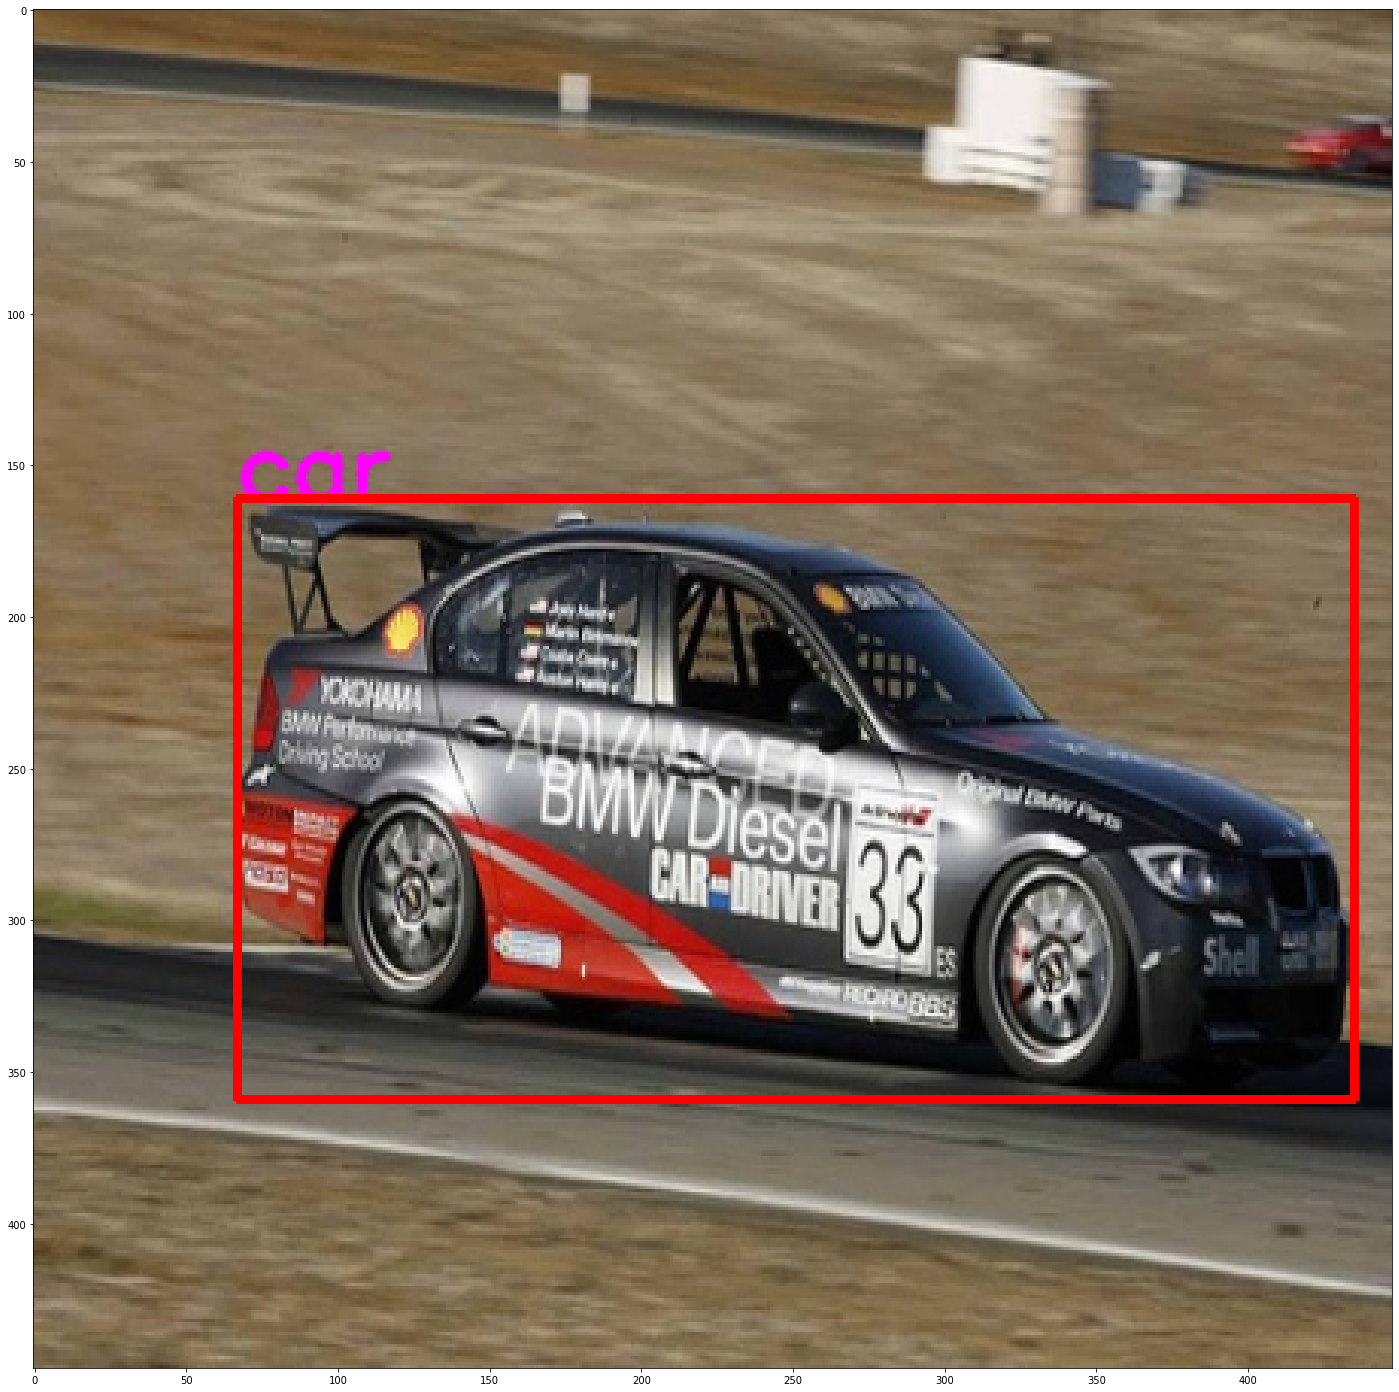

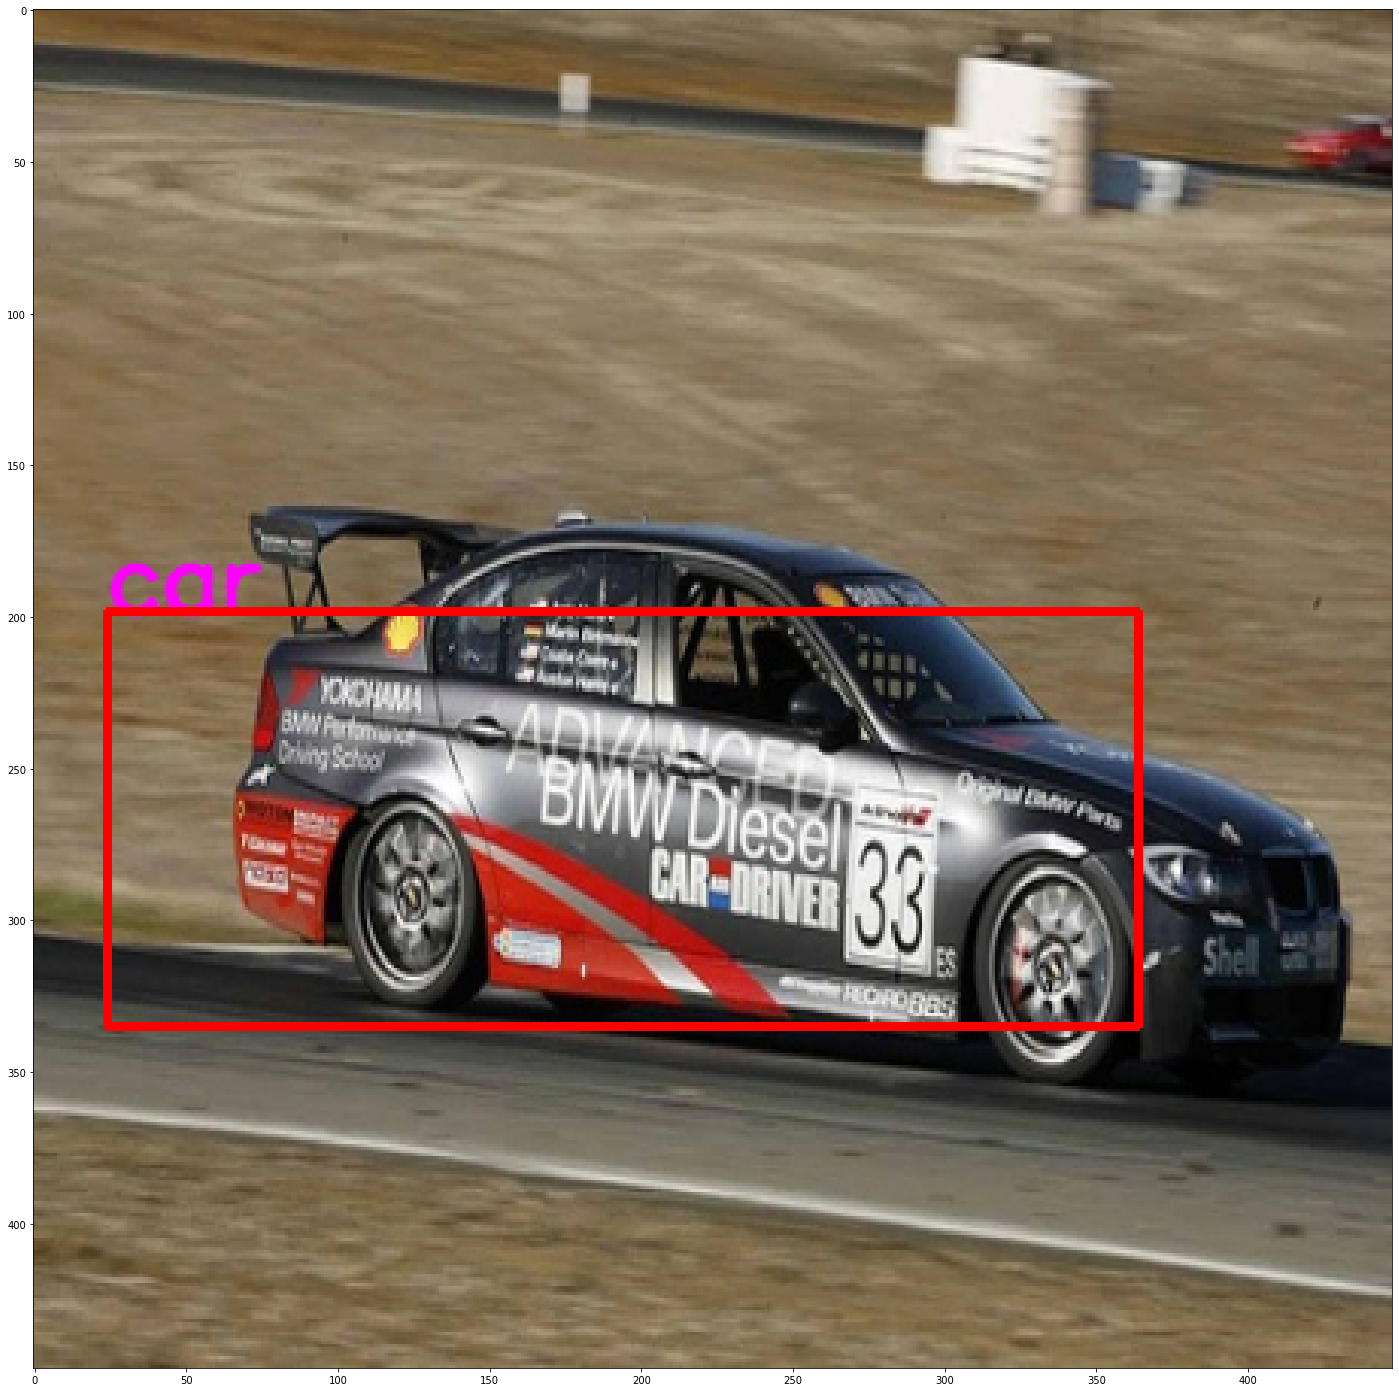

In [92]:
inputs = torch.zeros((1,3,448,448)).to(device)
labels = torch.zeros((1,7,7,30)).to(device)
data = test
idx = torch.randint(low = 0,high = len(data),size = (1,)).item()


inputs[0] = data[idx]["image"]

labels[0] = data[idx]["annotation"]



model.eval()
preds = model(inputs/255).view(labels.shape).detach()

print(yoloLoss(labels.float(),preds.float(),5,0.5))
print(accuracy(labels.float(),preds.float()))

sample ={"image":data[idx]["image"],"annotation":labels[0]}
showSample(sample,0.7)
sample ={"image":data[idx]["image"],"annotation":preds[0]}
showSample(sample,0.4)